The goal of this notebook is to prepare a set of images of arrows for which we will apply some group transformations, more precisely, rotation, translation about the x-axis and translation about the y-axis. Then we will save the transformed arrow images as vector embedded dataset (simple embedding, only reshaping the gray scale matrix) and try to visually identify these symmetries, both through dimensionality reduction techniques and TDA. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gudhi

# Rotation of the arrow about its center

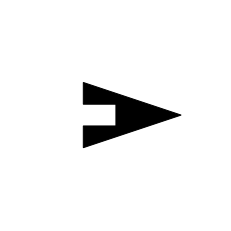

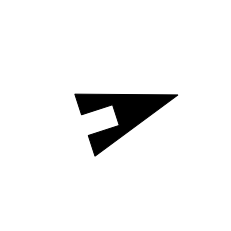

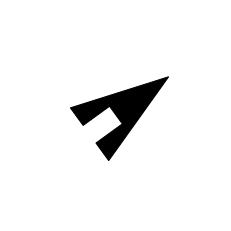

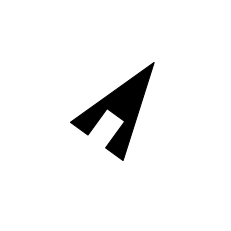

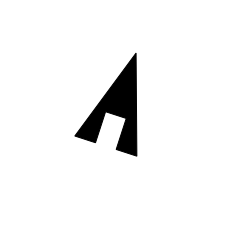

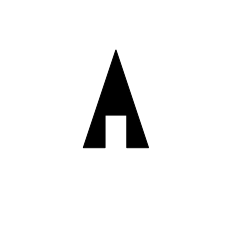

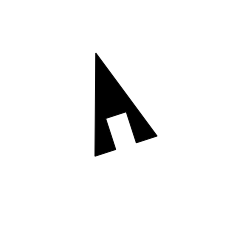

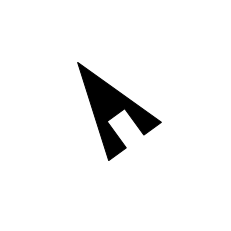

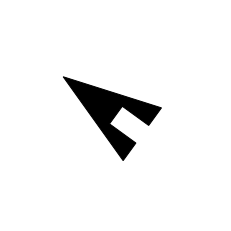

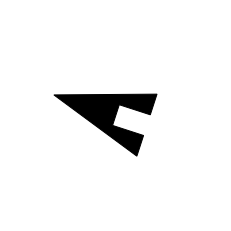

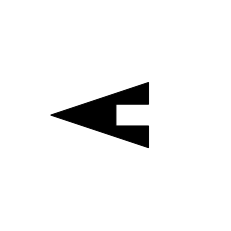

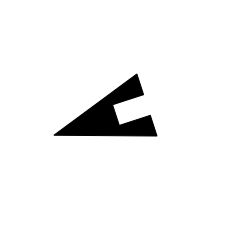

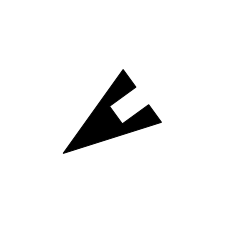

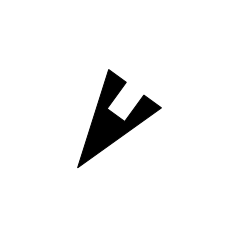

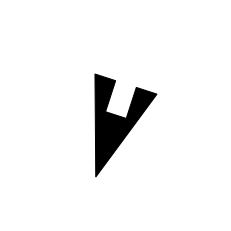

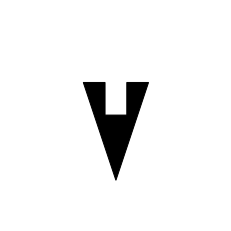

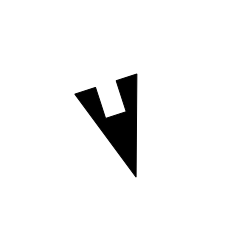

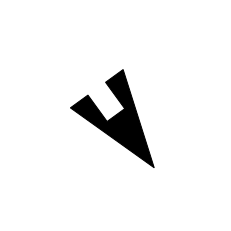

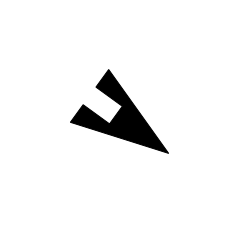

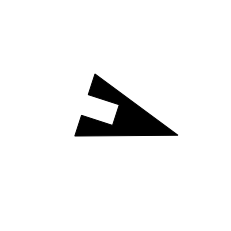

In [2]:
for value in range(0,20):
    fig, ax = plt.subplots()

    ax.arrow(0.5,0.5,0.3*np.cos(np.pi*value/10),0.3*np.sin(np.pi*value/10), width = 0.1, length_includes_head = True, 
             head_width = 0.3, color = 'black') #make the arrows centered at 0.5x0.5 and rotate them in a full turn in intervals
                                                # of 360/20 degrees
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    plt.gca().set_aspect('equal', adjustable='box') #make scale of axes as similar as possible
    plt.axis('off')  
    plt.draw()

    plt.savefig('rot'+str(value)+'.png', dpi=50) #dpi controls the number of pixels used

I performed a brute force transformation to grayscale (no need to worry about 3 channels and more complex image embedding for now, which really makes life easier). Idea on how to perform it from https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

from matplotlib.image import imread

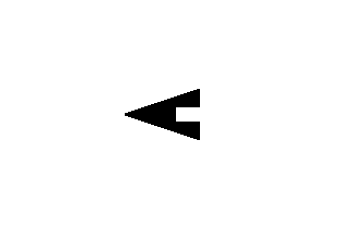

(200, 300)

In [4]:
image = imread('rot10.png')
gray = rgb2gray(image)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.axis('off')
plt.show()
np.shape(gray)

Let us check whether we can see an SO_2 kind structure when we look only at the rotations. For so, we might compare both PCA and ISOMAP reductions to check if we can get the desired shape.

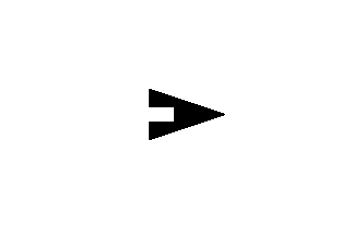

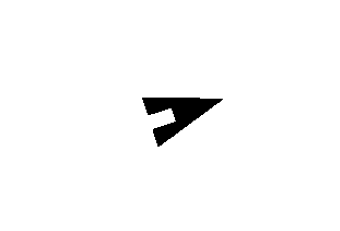

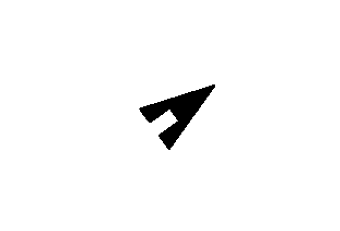

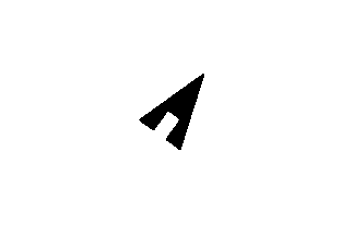

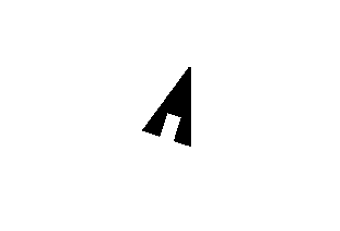

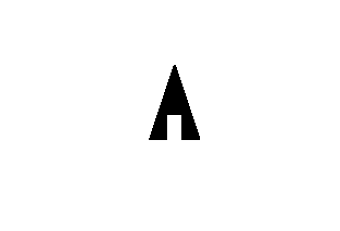

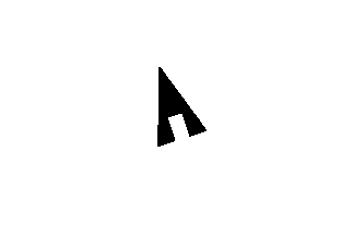

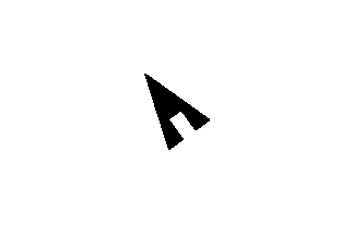

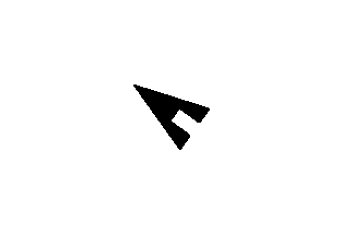

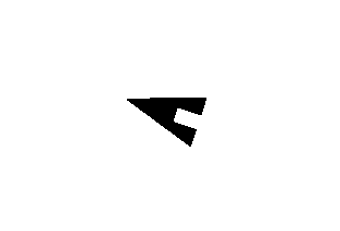

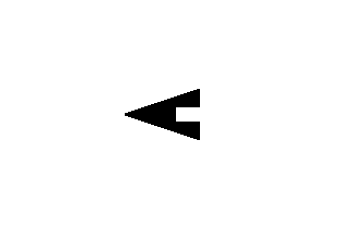

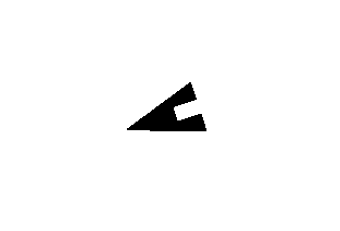

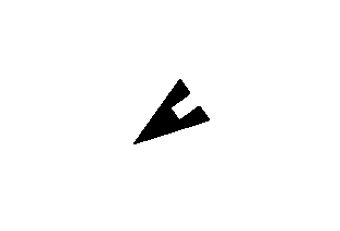

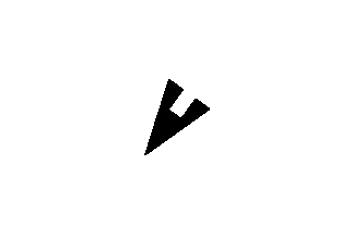

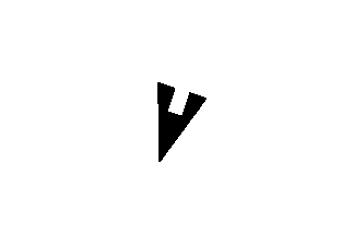

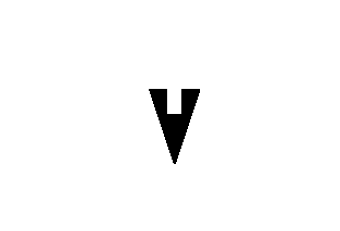

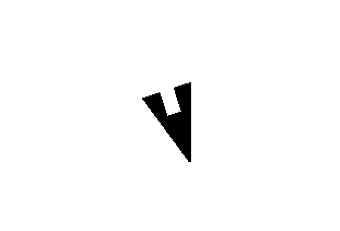

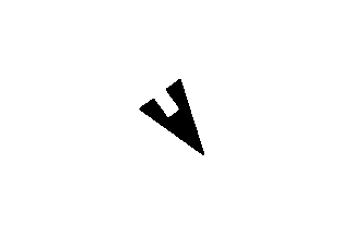

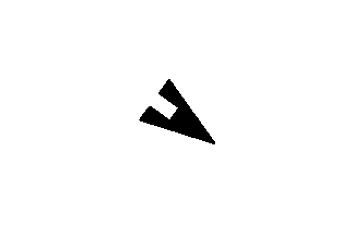

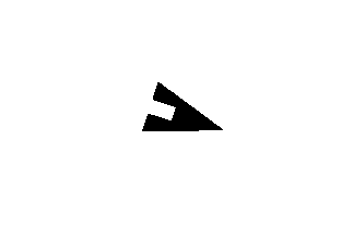

In [5]:
rot_dataset = []
for value in range(0,20):
    image = imread('rot'+str(value)+'.png')
    gray = rgb2gray(image)    
    plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    np.shape(gray)
    rot_dataset.append(gray.reshape(-1))

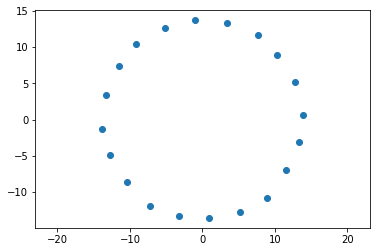

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data = pca.fit_transform(rot_dataset)
scatter = plt.scatter(data[:,0],data[:,1])
plt.axis("equal")
plt.show()

We do get exactly the SO_2 orbit action for the PCA. This means that the dataset does lie within a S_1 circle in the higher dimensional space! Let us check for ISOMAP

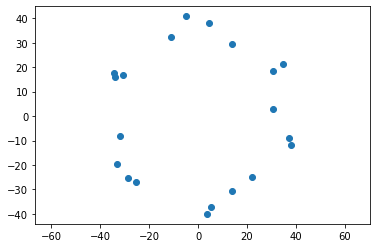

In [7]:
from sklearn.manifold import Isomap

embedding = Isomap(n_components=2)
data = embedding.fit_transform(rot_dataset)
scatter = plt.scatter(data[:,0],data[:,1])
plt.axis("equal")
plt.show()

We now get some deformation, but topologically speaking, the orbit space is exactly the same as S_1. Now, the question is: can we also see this type of structure in the original high dimension space? To probe this assumption, we can use Rips filtration to look for dim 1 cycles

usetex mode requires TeX.


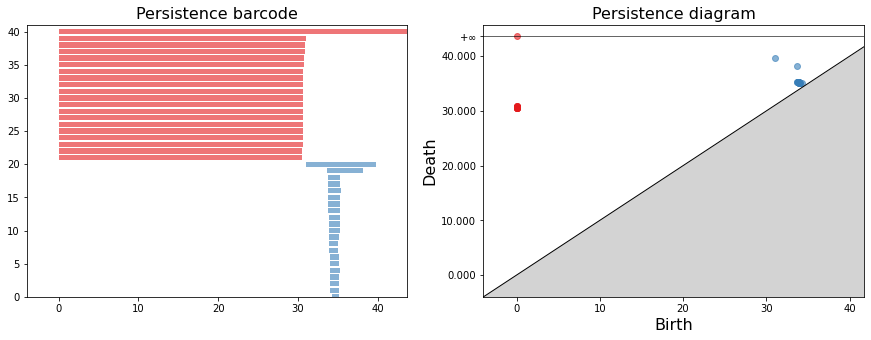

In [8]:
rips = gudhi.RipsComplex(points = rot_dataset, max_edge_length = 50)
st = rips.create_simplex_tree(max_dimension = 2)


barcodes = st.persistence(homology_coeff_field = 2)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
gudhi.plot_persistence_barcode(barcodes, axes = ax1)
gudhi.plot_persistence_diagram(barcodes, axes = ax2)
plt.show()

There seems to be a 1-cycle of persistence barcode of (30,40), but the high dimension makes it somewhat hidden within, so the cycle is not as clear as it is in the 2 dimensional PCAed data

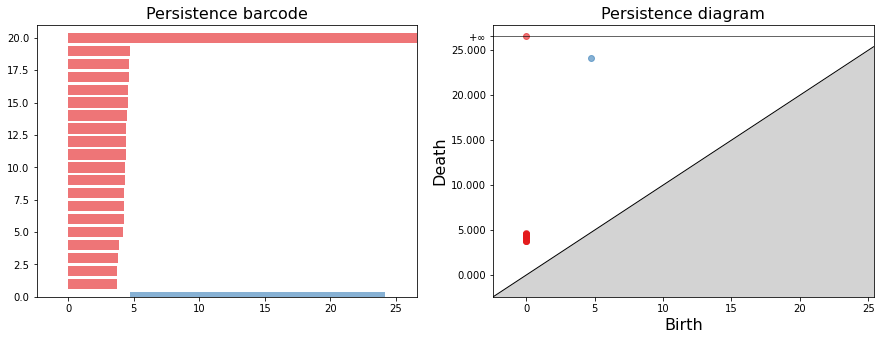

In [9]:
pca = PCA(n_components=2)
data = pca.fit_transform(rot_dataset)

rips = gudhi.RipsComplex(points = data, max_edge_length = 50)
st = rips.create_simplex_tree(max_dimension = 2)


barcodes = st.persistence(homology_coeff_field = 2)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
gudhi.plot_persistence_barcode(barcodes, axes = ax1)
gudhi.plot_persistence_diagram(barcodes, axes = ax2)
plt.show()

The question we must look for answering is whether this "noise" is due to the embedding or simply because we are working in very high dimension and stuff is weird there.

# Two rotations


Now we will look at the SO_2 symmetry applied to arrows with distinct rotation centers. This should give as orbit two disjoint circles, which may or may not close each other.

<ipython-input-10-3826336a14e2>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


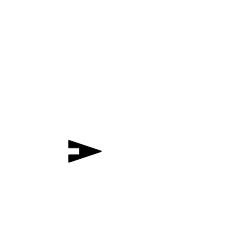

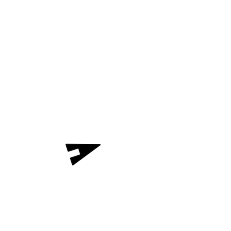

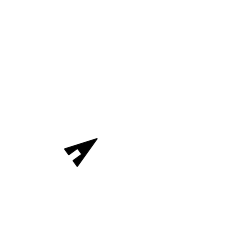

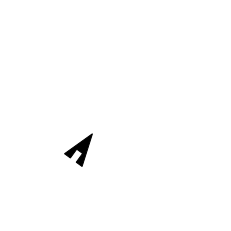

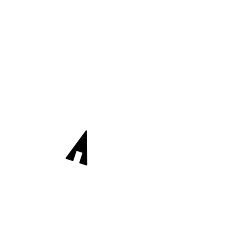

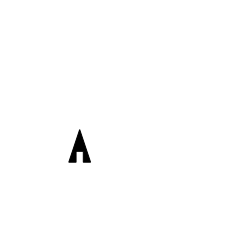

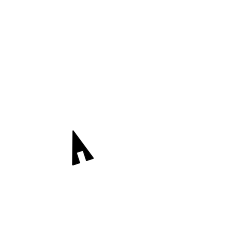

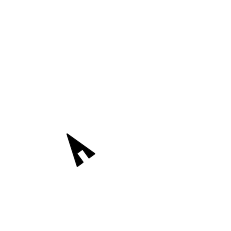

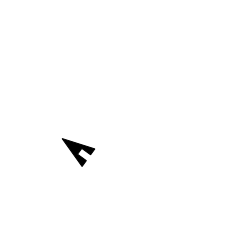

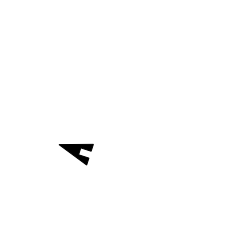

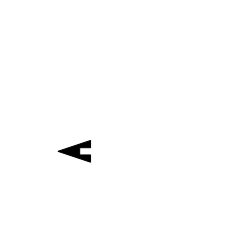

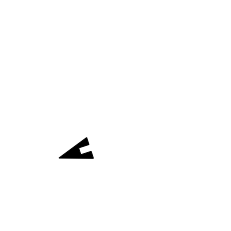

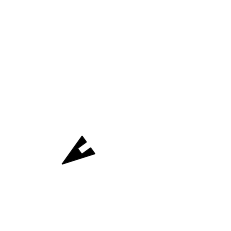

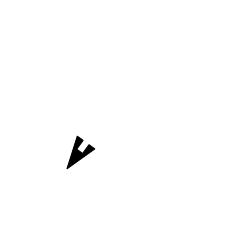

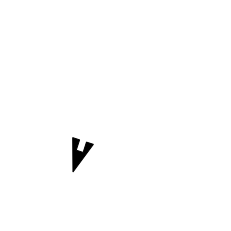

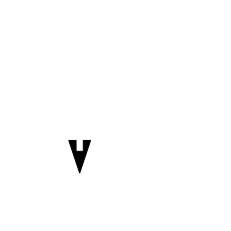

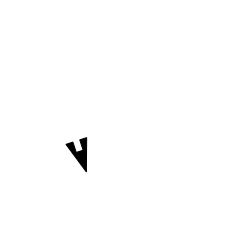

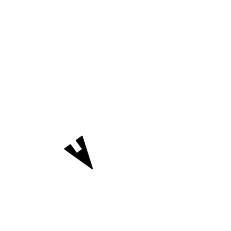

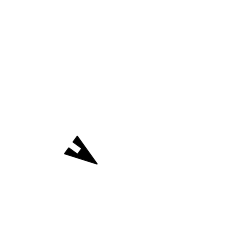

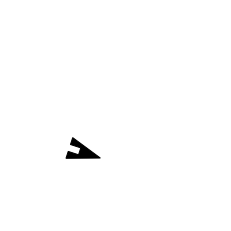

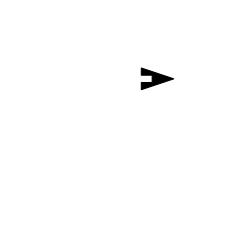

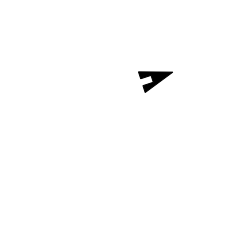

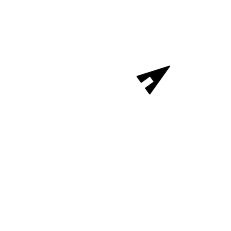

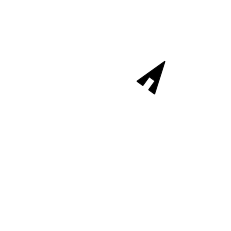

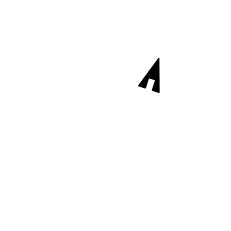

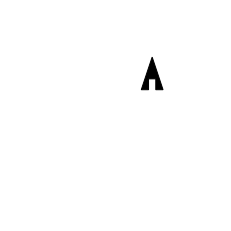

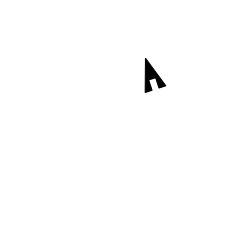

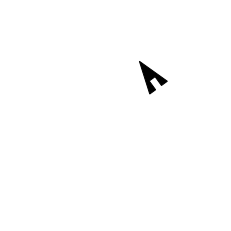

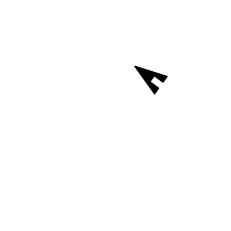

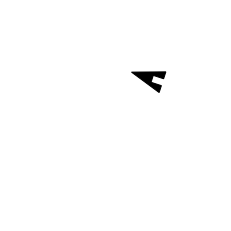

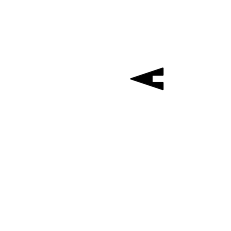

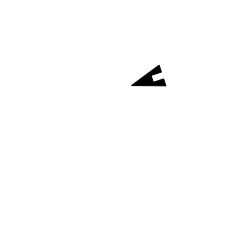

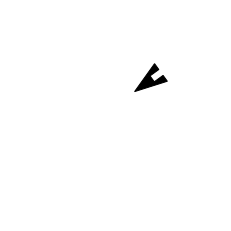

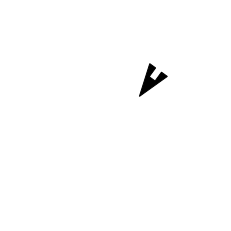

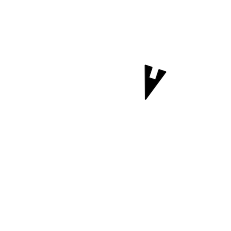

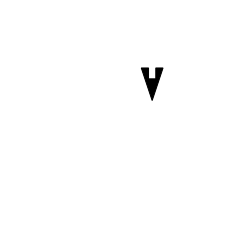

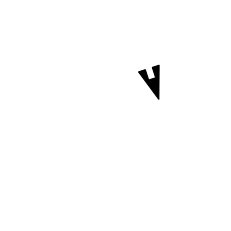

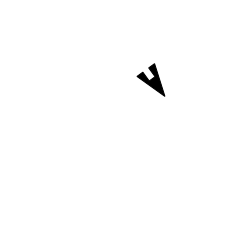

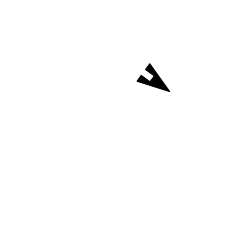

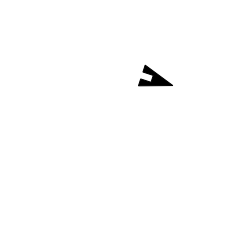

In [10]:
for value in range(0,20):
    fig, ax = plt.subplots()

    ax.arrow(1 , 1,0.3*np.cos(np.pi*value/10),0.3*np.sin(np.pi*value/10), width = 0.1, length_includes_head = True, 
             head_width = 0.3, color = 'black')
    ax.set_xlim([0, 3])
    ax.set_ylim([0, 3])
    plt.gca().set_aspect('equal', adjustable='box') #make scale of axes as similar as possible
    plt.axis('off')  
    plt.draw()

    plt.savefig('two_rot_1'+str(value)+'.png', dpi=50) #dpi controls the number of pixels used
    
for value in range(0,20):
    fig, ax = plt.subplots()

    ax.arrow(2, 2,0.3*np.cos(np.pi*value/10),0.3*np.sin(np.pi*value/10), width = 0.1, length_includes_head = True, 
             head_width = 0.3, color = 'black')
    ax.set_xlim([0, 3])
    ax.set_ylim([0, 3])
    plt.gca().set_aspect('equal', adjustable='box') #make scale of axes as similar as possible
    plt.axis('off')  
    plt.draw()

    plt.savefig('two_rot_2'+str(value)+'.png', dpi=50) #dpi controls the number of pixels used

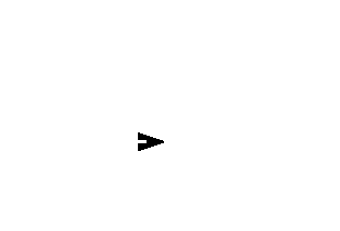

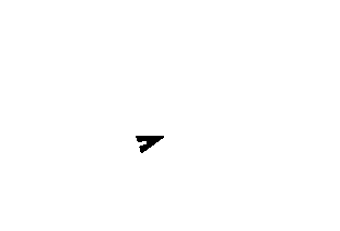

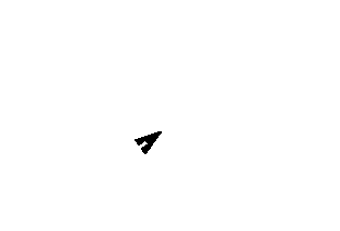

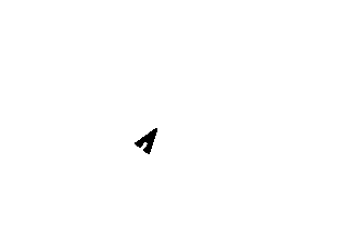

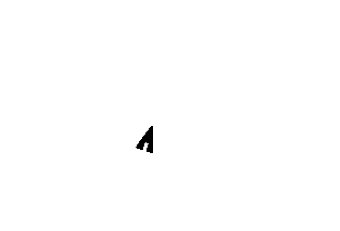

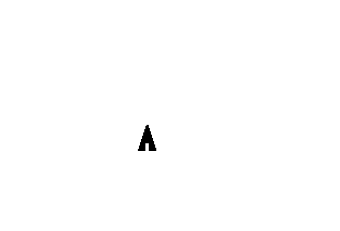

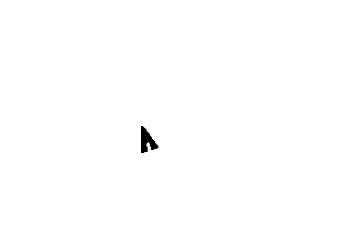

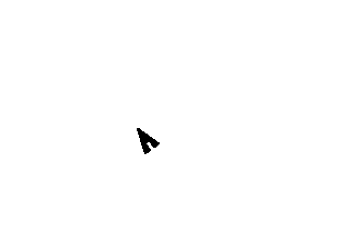

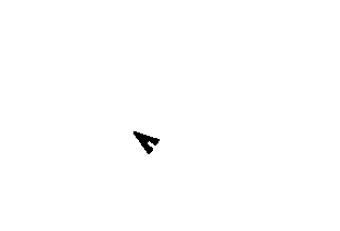

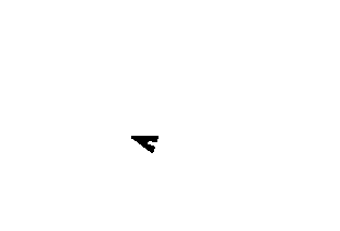

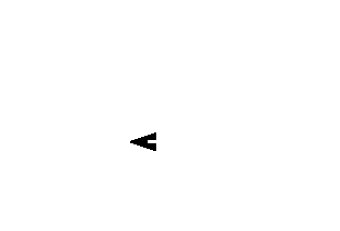

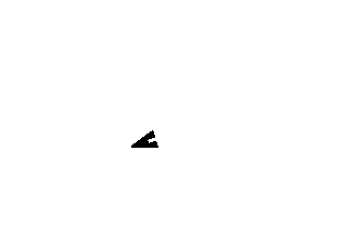

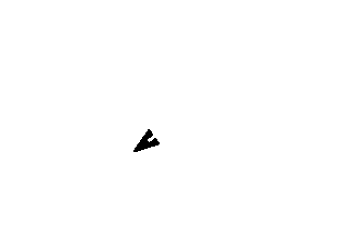

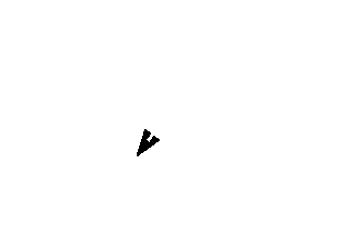

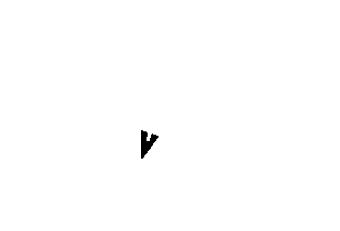

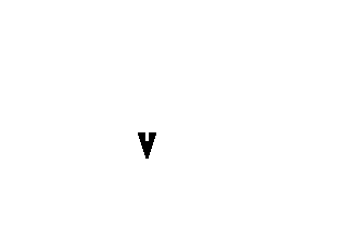

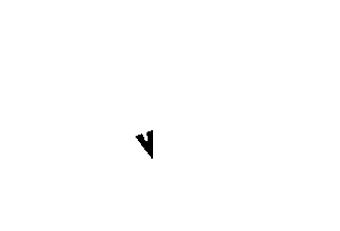

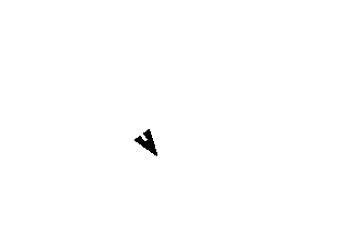

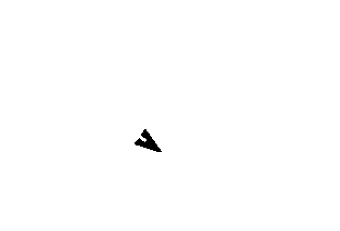

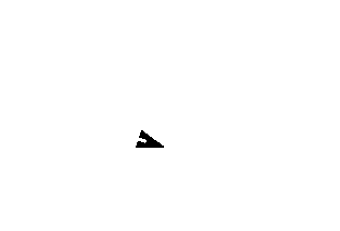

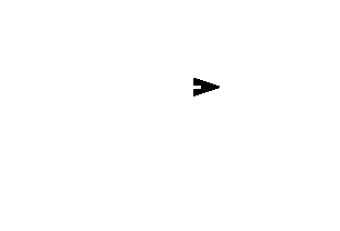

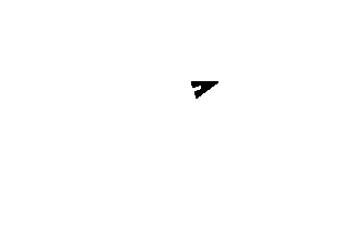

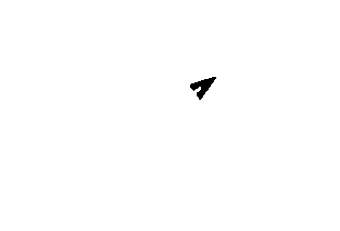

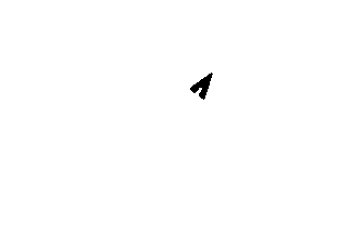

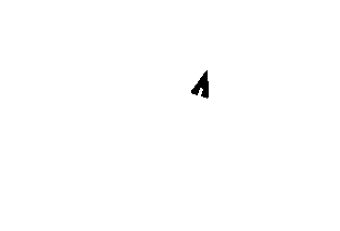

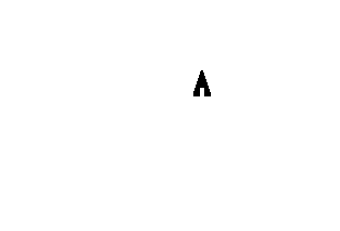

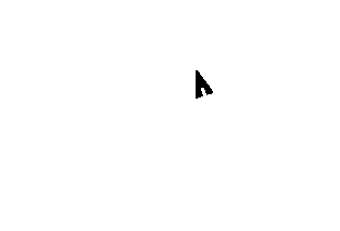

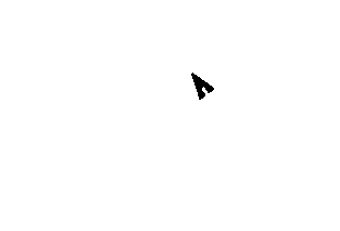

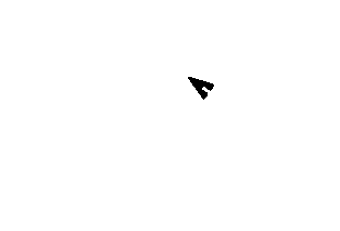

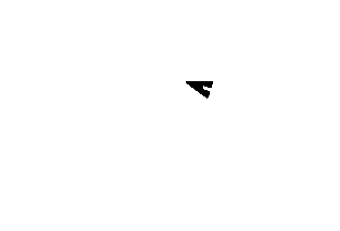

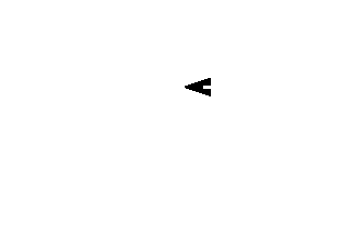

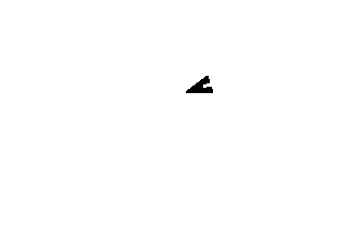

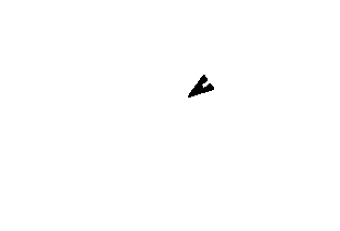

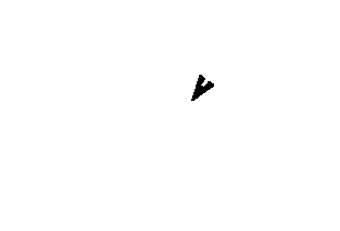

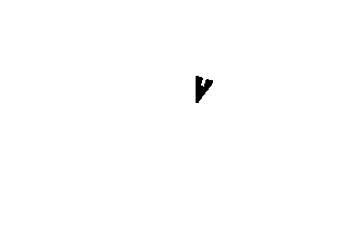

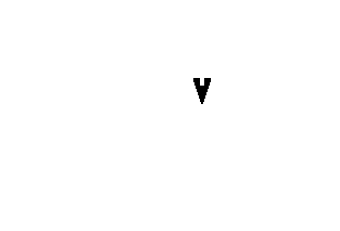

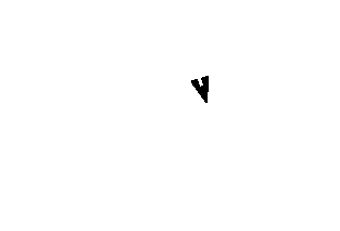

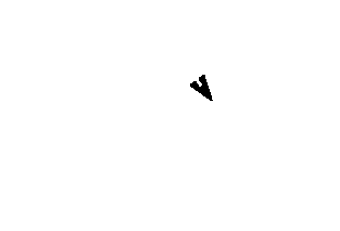

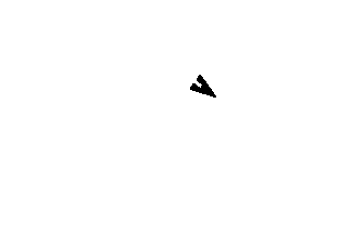

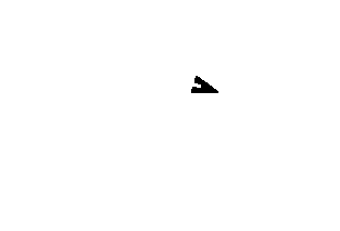

In [11]:
rot_dataset_1 = []
for value in range(0,20):
    image = imread('two_rot_1'+str(value)+'.png')
    gray = rgb2gray(image)    
    plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    np.shape(gray)
    rot_dataset_1.append(gray.reshape(-1))

label_rot_1 = []
for i in range(len(rot_dataset)):
    label_rot_1.append(0)
    
rot_dataset_2 = []
for value in range(0,20):
    image = imread('two_rot_2'+str(value)+'.png')
    gray = rgb2gray(image)    
    plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    np.shape(gray)
    rot_dataset_2.append(gray.reshape(-1))

label_rot_2 = []
for i in range(len(rot_dataset)):
    label_rot_2.append(1)

In [12]:
full_dataset = rot_dataset_1 + rot_dataset_2 
full_label = label_rot_1 + label_rot_2

As we are looking for two distinct circles, the spanned space should be embedded, at least, in dimension 3. So PCAing to that dimension

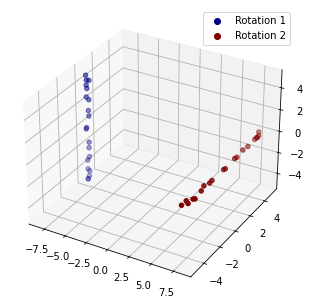

In [13]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
data = pca.fit_transform(full_dataset)

fig = plt.figure()
ax = Axes3D(fig)

classes = ['Rotation 1', 'Rotation 2']
scatter = ax.scatter(data[:,0], data[:,1], data[:,2], c = full_label, cmap = "jet")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

Not so good, PCA is straighting the circles. Let us see how ISOMAP does it

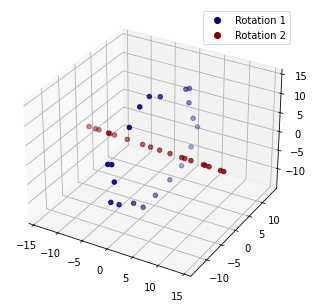

In [14]:
embedding = Isomap(n_components=3)
data = embedding.fit_transform(full_dataset)

fig = plt.figure()
ax = Axes3D(fig)

classes = ['Rotation 1', 'Rotation 2']
scatter = ax.scatter(data[:,0], data[:,1], data[:,2], c = full_label, cmap = "jet")
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

Better! Even though one of the circles was straighted, the other is prettu much preserved. This indicates us two things: 1. dimension where the spanned space might be distinquisheable is at least 4; 2. there indeed seems to be two circles (ISOMAP "chooses" one to straight out, but by symmetry, the straighted one should also have been a circle at some dimension bigger than 4). To actually probe if that is the case, we can look at the Rips complex for 2 1-cycles.

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

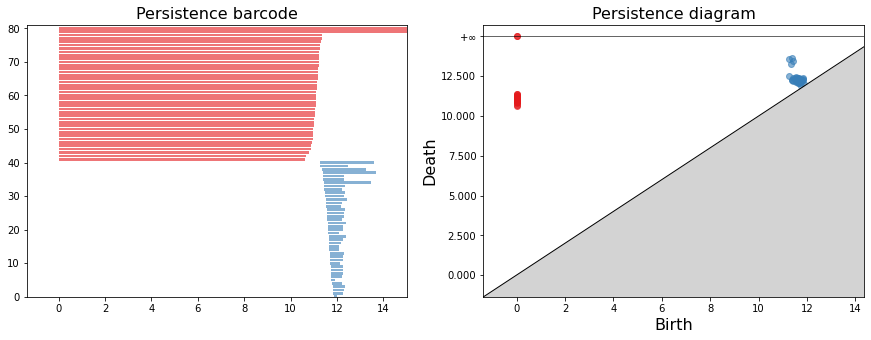

In [15]:
rips = gudhi.RipsComplex(points = full_dataset, max_edge_length = 14)
st = rips.create_simplex_tree(max_dimension = 2)


barcodes = st.persistence(homology_coeff_field = 2)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
gudhi.plot_persistence_barcode(barcodes, axes = ax1)
gudhi.plot_persistence_diagram(barcodes, axes = ax2)

Again, at the high dimension the data looks noisy. If we decrease the dimension to 4, it should then be some better

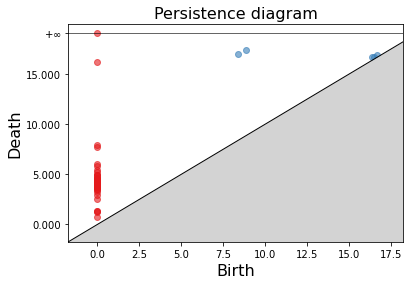

In [16]:
embedding = Isomap(n_components=4)
data = embedding.fit_transform(full_dataset)


rips = gudhi.RipsComplex(points = data, max_edge_length = 50)
st = rips.create_simplex_tree(max_dimension = 2)


barcodes = st.persistence(homology_coeff_field = 2)
gudhi.plot_persistence_diagram(barcodes)
plt.show()

Perfect! Two 1-cycles detected!

# Adding truncated translations

The big problem with studying translational symmetries for images is that, for a perfect approach, it requires an infinite plane of pixels. That is clear impossible, so we have basically 3 options:
1. Truncated translation: truncate the translations so that we do not consider points where the arrows would be cropped by the edge of the pixel matrix
2. Non-periodic translation: simply let the arrows be cropped when leaving the pixel matrix area
3. Periodic translation: when the arrow leaves the pixel area, another identical arrow enters through the opposite side

Of these, only 1 approximate well what translation symmetry is supposed to look like. The rest, will include distorsions, being the 2 a little too complicated to describe and 3 something like a SO_2 symmetry again. So, we will start by looking at 1 first. 

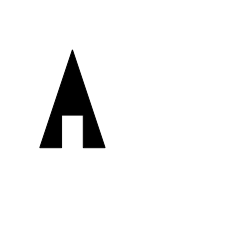

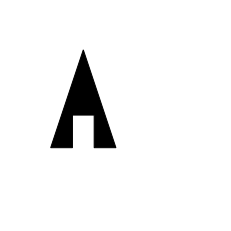

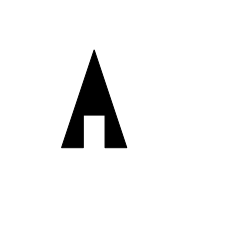

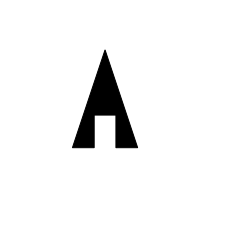

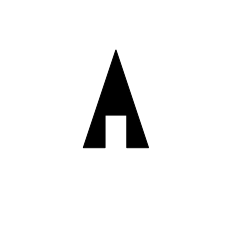

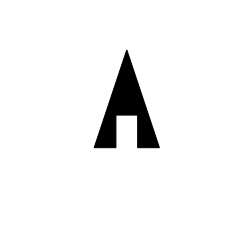

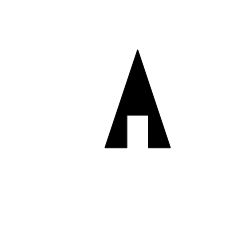

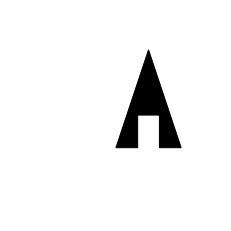

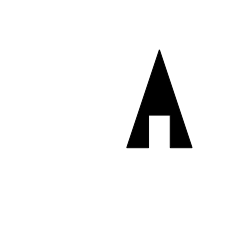

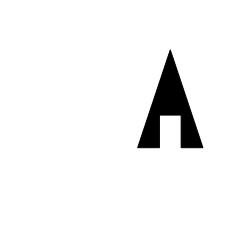

In [17]:
for value in range(0,10): 
    fig, ax = plt.subplots()

    ax.arrow(0.3+value*0.05,0.5,0,0.3, width = 0.1, length_includes_head = True, 
             head_width = 0.3, color = 'black')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')  
    plt.savefig('x_trans'+str(value)+'.png', dpi=50)

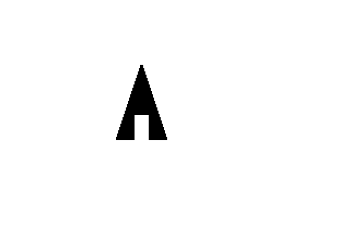

(200, 300)

In [18]:
image = imread('x_trans0.png')
gray = rgb2gray(image)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.axis('off')
plt.show()
np.shape(gray)

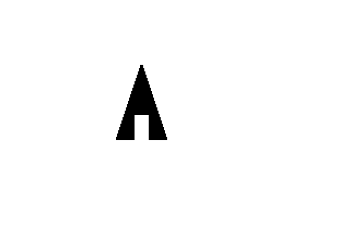

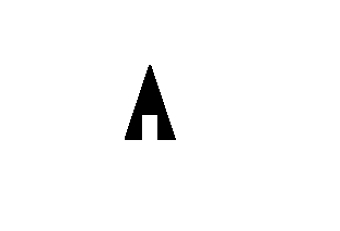

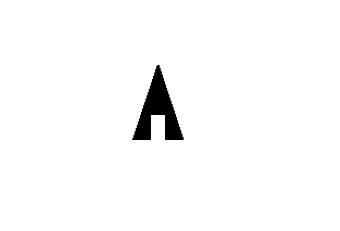

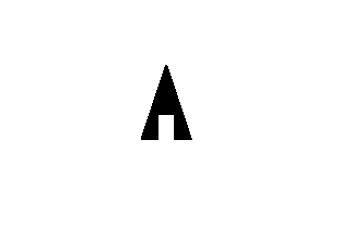

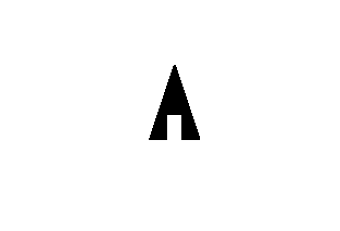

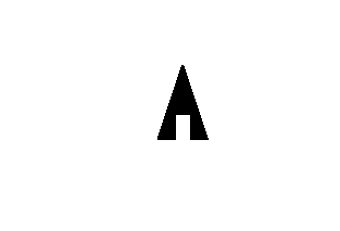

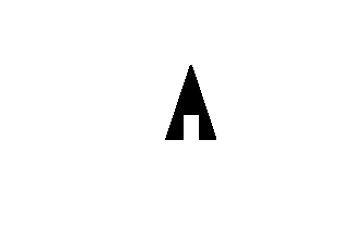

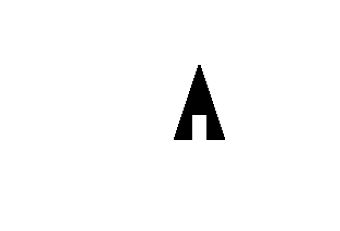

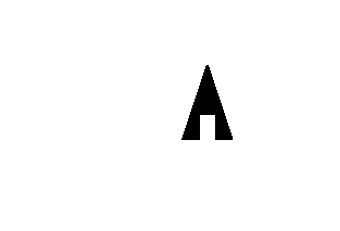

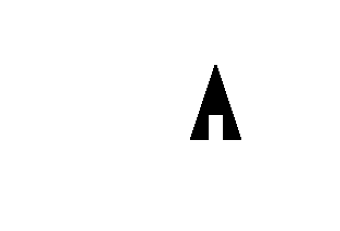

In [19]:
x_trans_dataset = []
for value in range(0,10):
    image = imread('x_trans'+str(value)+'.png')
    gray = rgb2gray(image)    
    plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    np.shape(gray)
    x_trans_dataset.append(gray.reshape(-1))

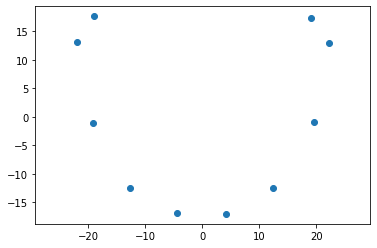

In [20]:
pca = PCA(n_components=2)
data = pca.fit_transform(x_trans_dataset)
scatter = plt.scatter(data[:,0],data[:,1])
plt.axis("equal")
plt.show()

As one can see, PCA kills the linear part expected. On the other hand, though, the symmetry about positive and negative translations is preserved, which is, in fact, an important feature of this particular Lie group. Let us see how ISOMAP behaves.

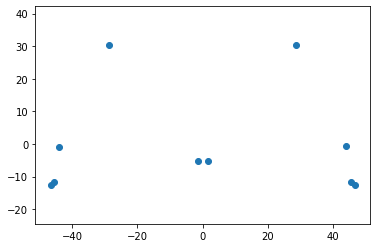

In [21]:
embedding = Isomap(n_components=2)
data = embedding.fit_transform(x_trans_dataset)
scatter = plt.scatter(data[:,0],data[:,1])
plt.axis("equal")
plt.show()

ISOMAP makes it even worse! However, we still get the expected symmetry

# Mix of 2 translations

Let us now see how the dataset behaves when we have two translations as degrees of freemdom. Now, the dataset should be lie within a 2D manifold, so let us check how the dataset behaves for this 2D orbit space.

<ipython-input-22-75ee5e552bf2>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


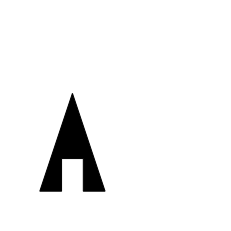

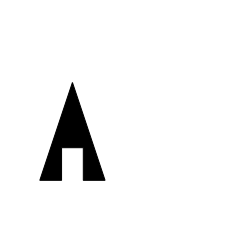

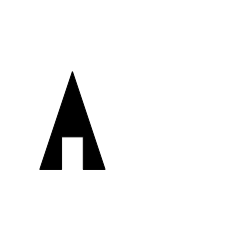

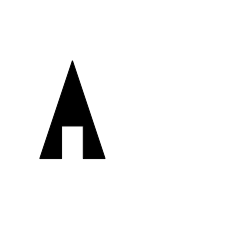

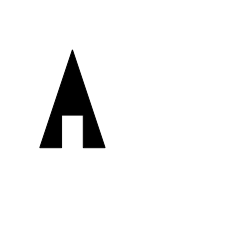

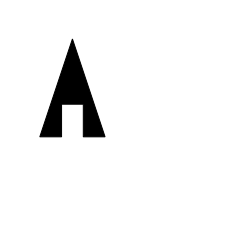

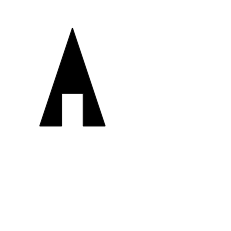

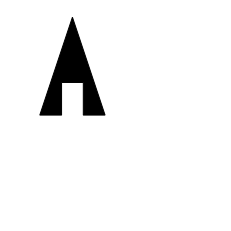

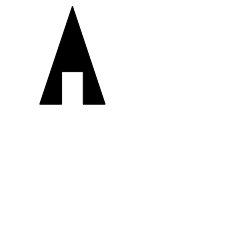

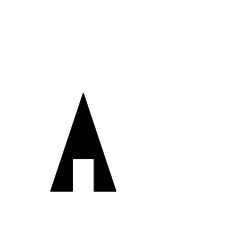

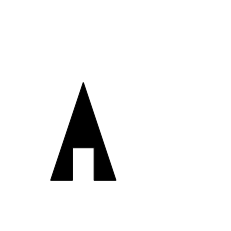

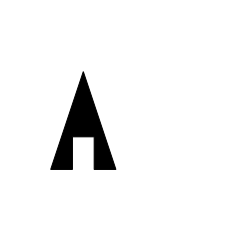

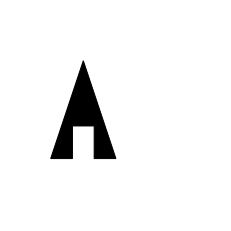

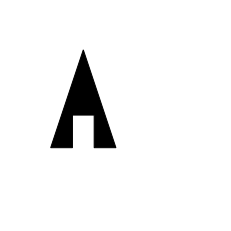

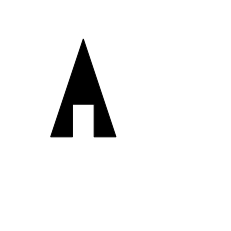

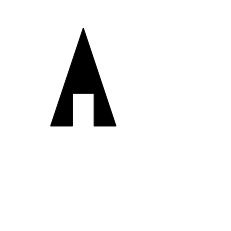

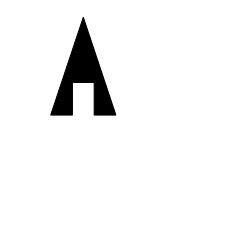

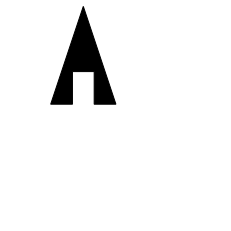

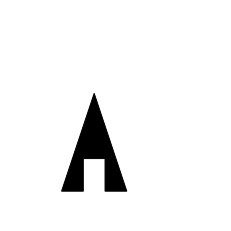

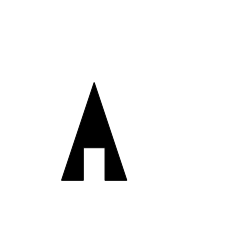

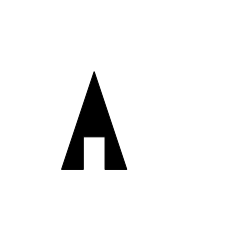

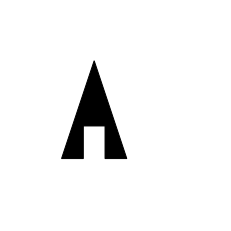

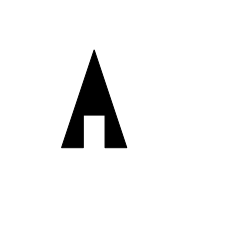

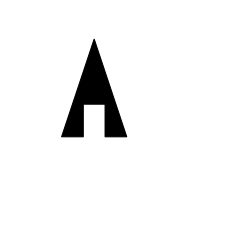

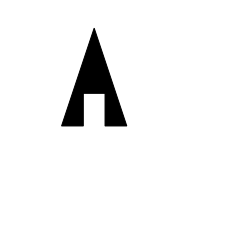

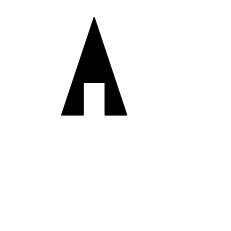

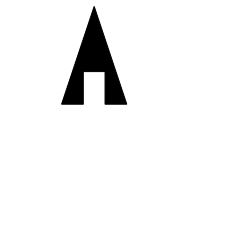

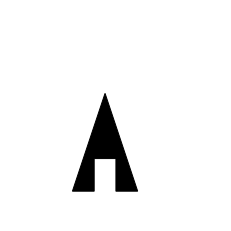

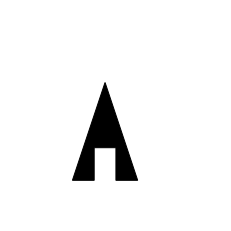

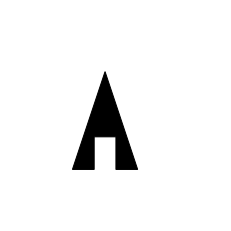

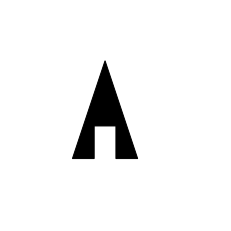

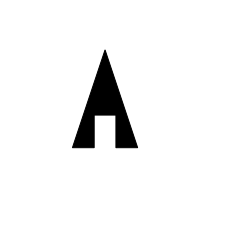

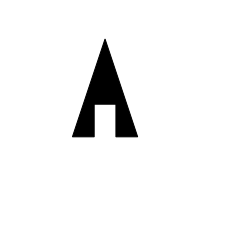

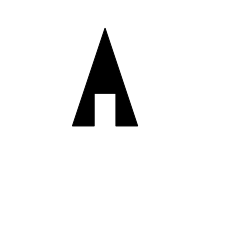

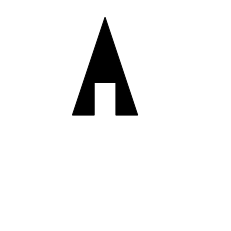

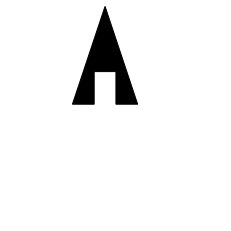

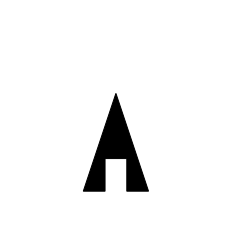

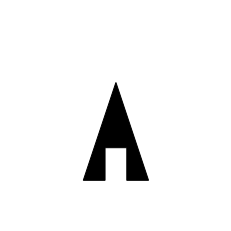

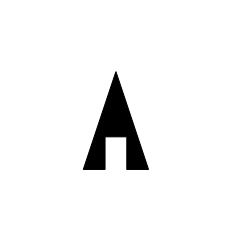

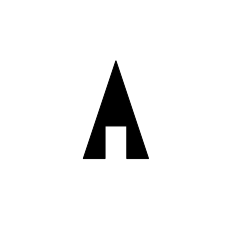

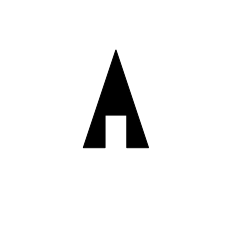

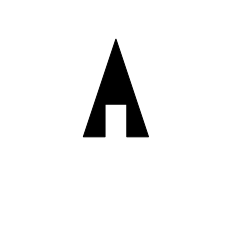

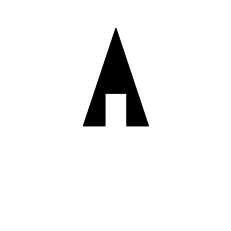

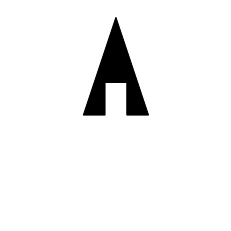

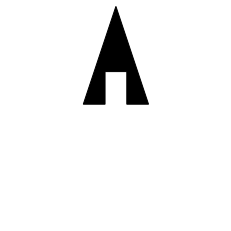

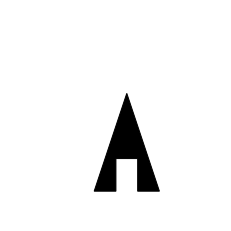

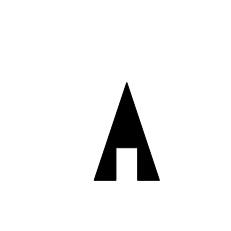

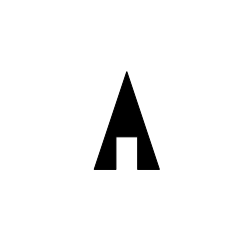

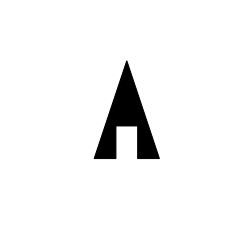

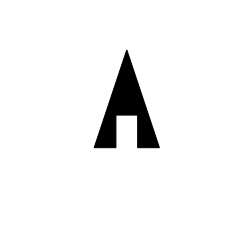

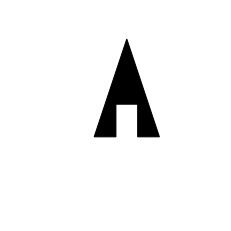

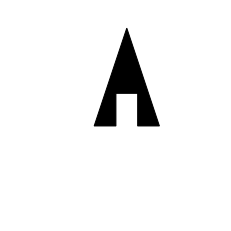

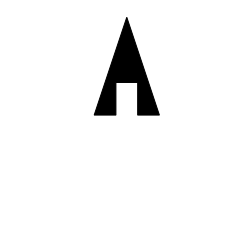

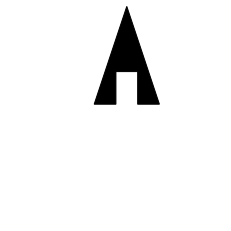

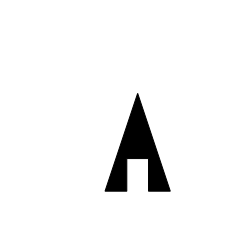

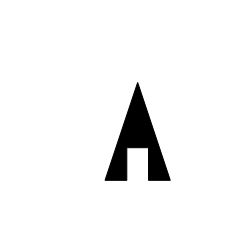

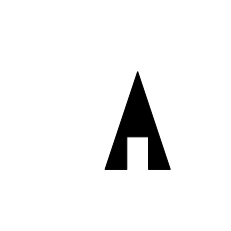

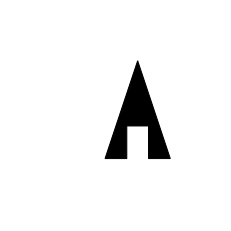

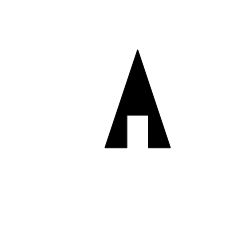

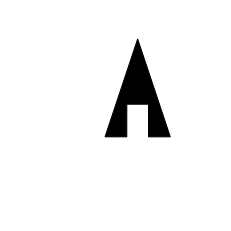

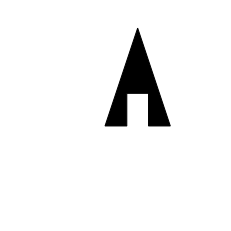

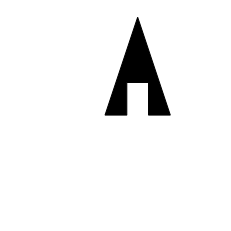

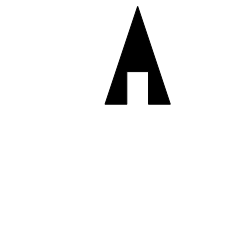

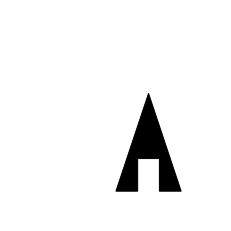

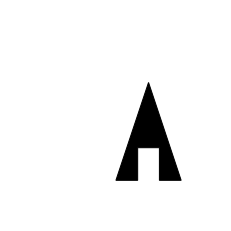

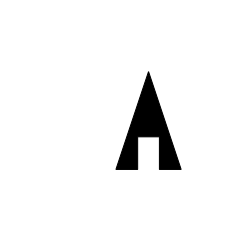

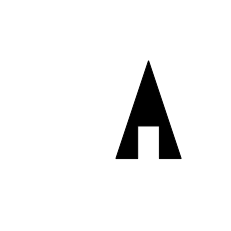

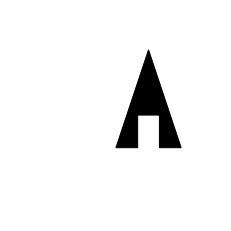

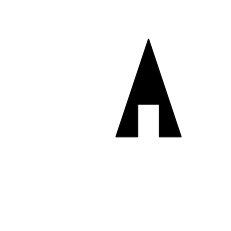

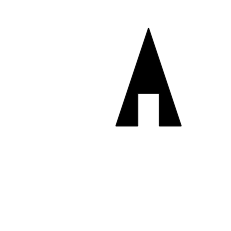

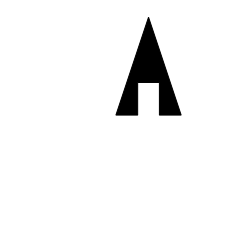

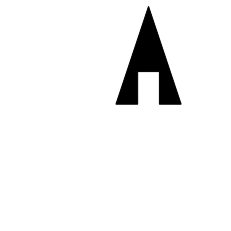

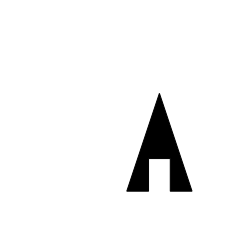

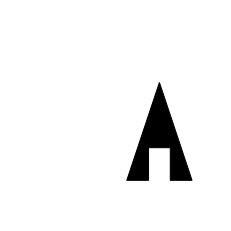

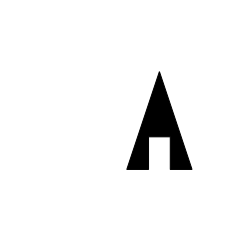

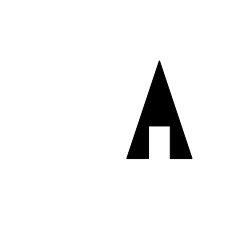

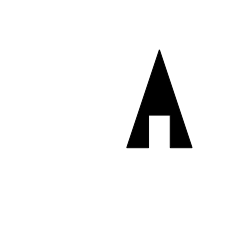

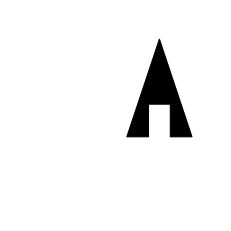

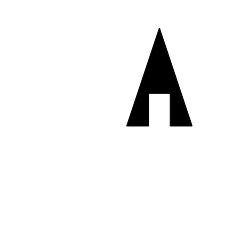

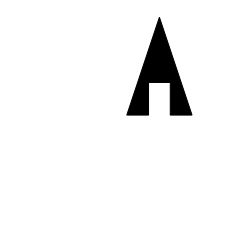

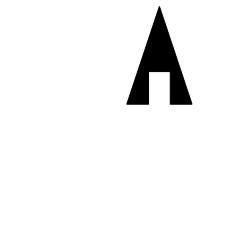

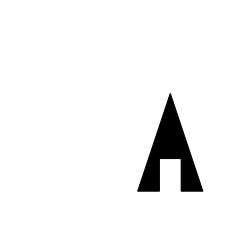

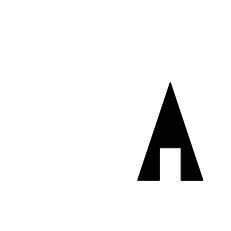

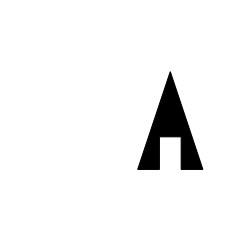

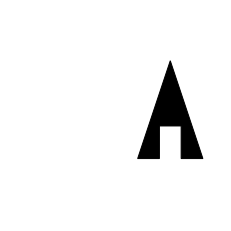

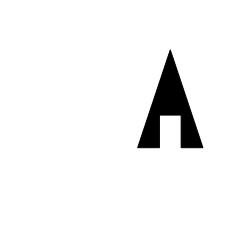

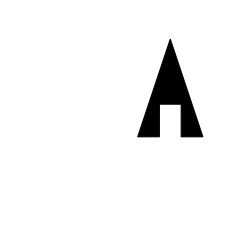

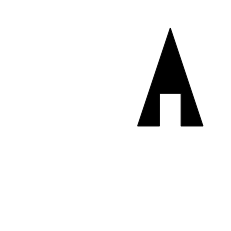

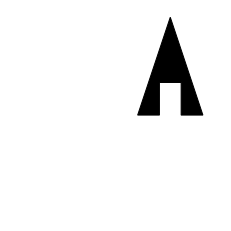

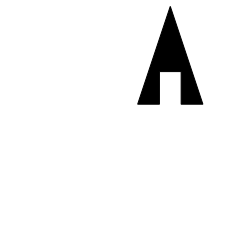

In [22]:
for x in range(0,10):
    for y in range(0,9):
        fig, ax = plt.subplots()

        ax.arrow(0.3+x*0.05,0.3+y*0.05,0,0.3, width = 0.1, length_includes_head = True, 
                 head_width = 0.3, color = 'black')
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        plt.gca().set_aspect('equal', adjustable='box')
        plt.axis('off')  
        plt.savefig('two_trans'+str(x)+'-'+str(y)+'.png', dpi=50)

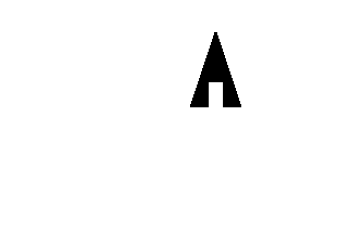

In [23]:
two_translation = []
for x in range(0,10):
    for y in range(0,9):
        image = imread('two_trans'+str(x)+'-'+str(y)+'.png')
        gray = rgb2gray(image)    
        plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
        plt.axis('off')
        np.shape(gray)
        two_translation.append(gray.reshape(-1))

We expect the result to be a plane in the higher dimesnional space, so let us see if that is the case by projecting it to R^3

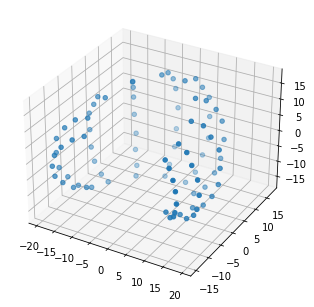

In [24]:
pca = PCA(n_components=3)
data = pca.fit_transform(two_translation)

fig = plt.figure()
ax = Axes3D(fig)

scatter = ax.scatter(data[:,0], data[:,1], data[:,2])
plt.show()

So, not so much. We have to think for why is it the case. My guess for now is that it is caused by the limited action of the group in the pixel plane, not allowing us to fully represent the symmetry. However, there is some interesting structure to be looked for, as it is clear from those semi-circle like orbits

# Translation + rotation

Let us now look at the space spanned by a one translation and one rotation. The spanned space should be something like a cylinder.

<ipython-input-25-5c82cd3c8f01>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


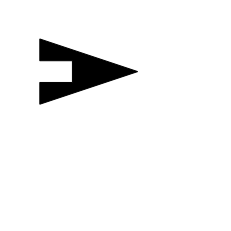

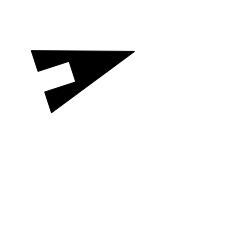

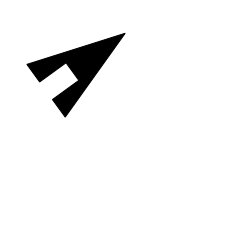

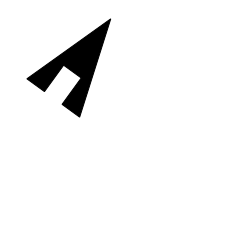

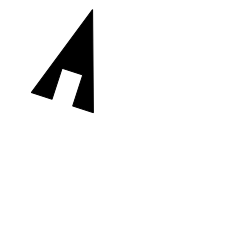

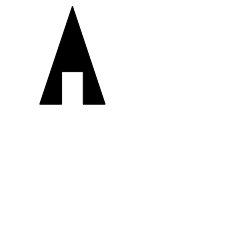

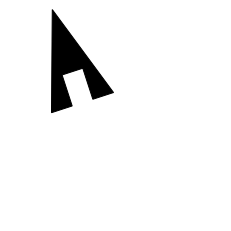

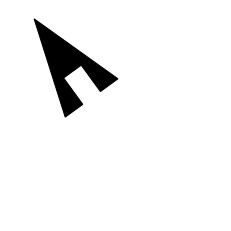

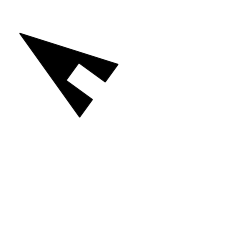

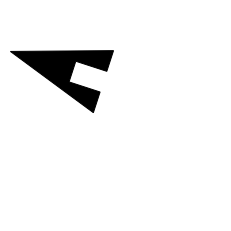

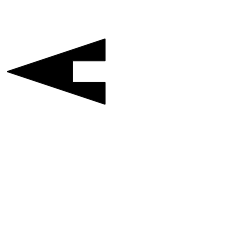

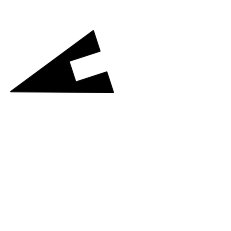

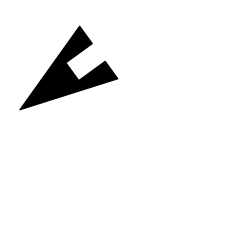

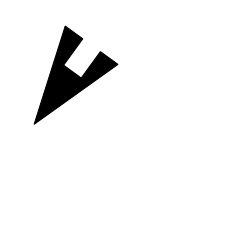

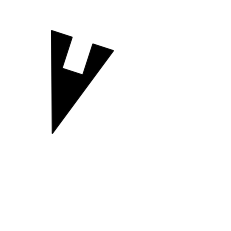

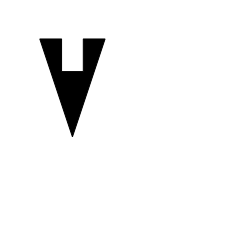

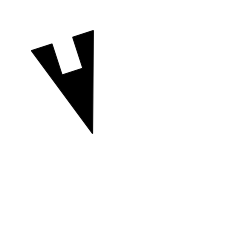

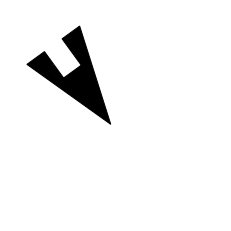

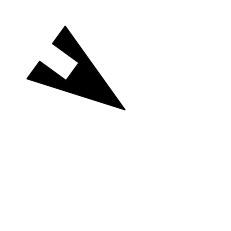

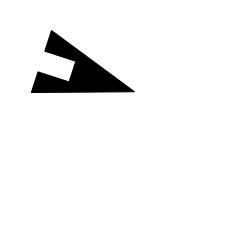

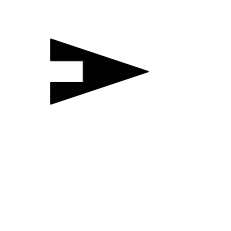

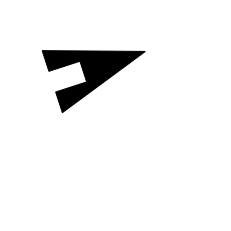

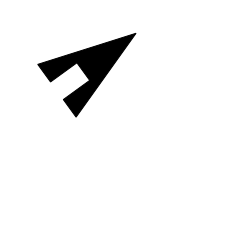

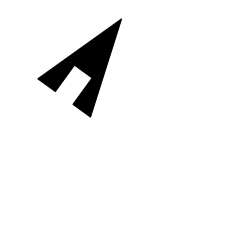

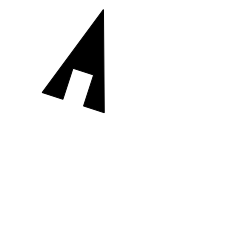

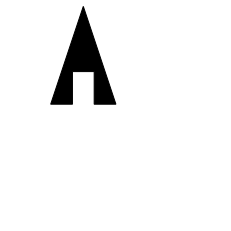

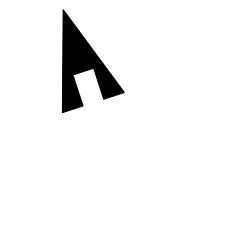

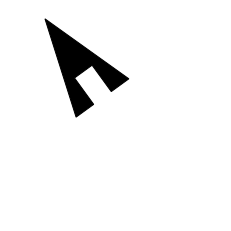

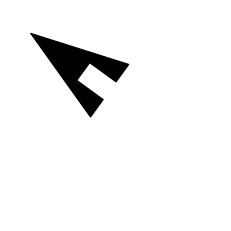

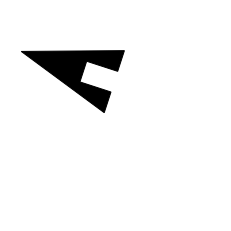

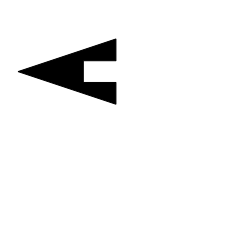

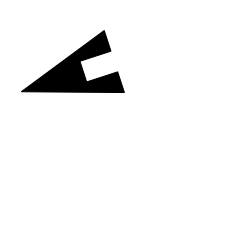

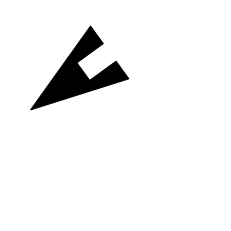

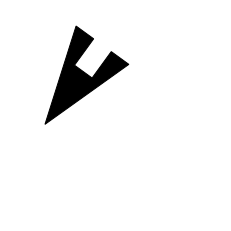

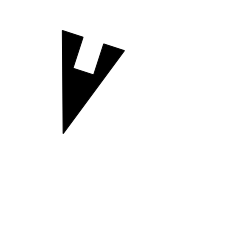

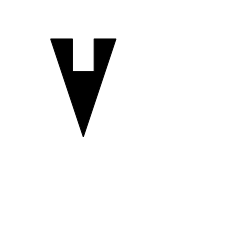

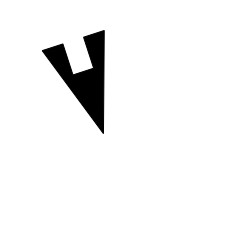

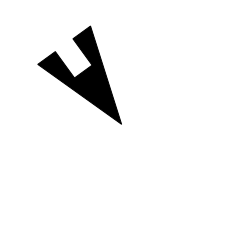

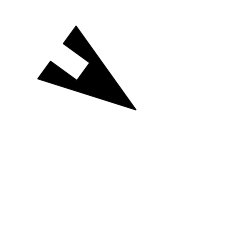

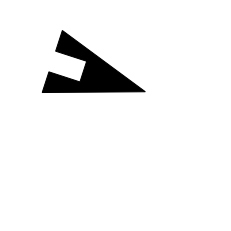

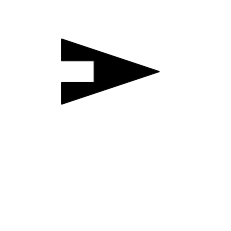

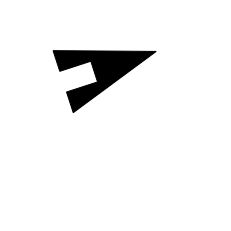

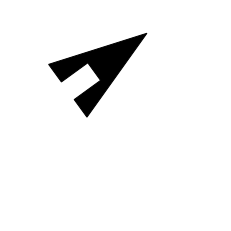

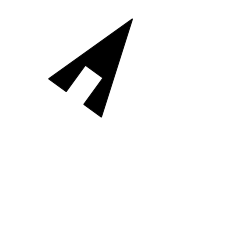

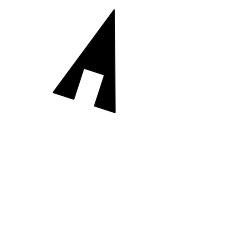

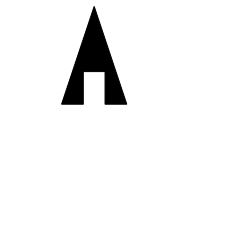

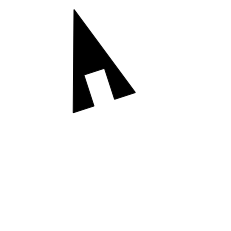

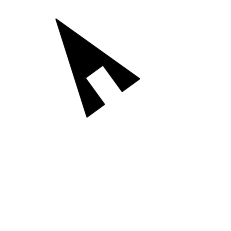

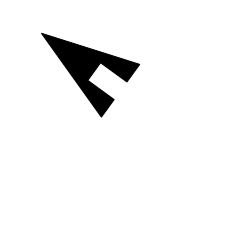

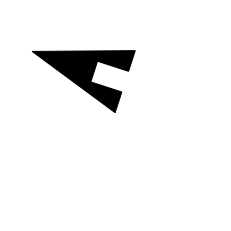

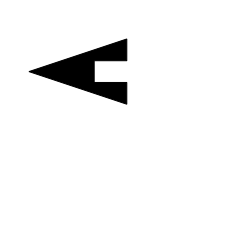

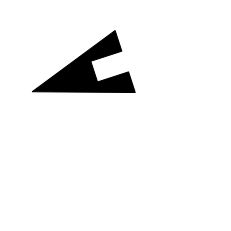

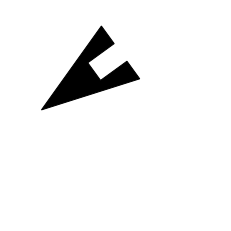

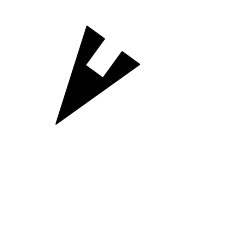

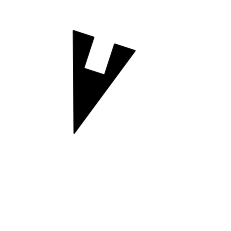

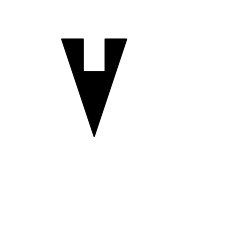

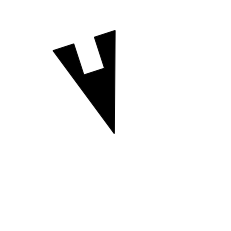

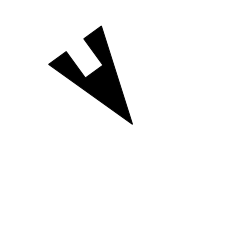

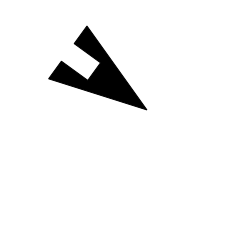

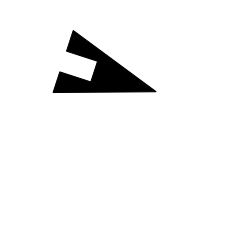

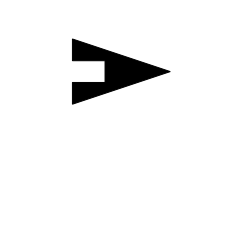

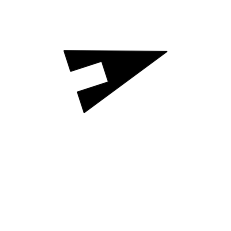

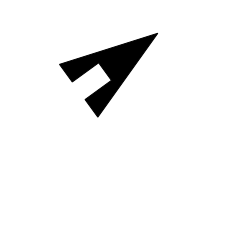

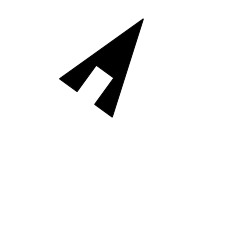

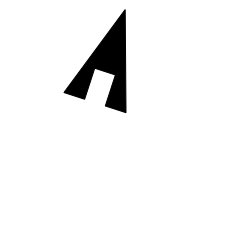

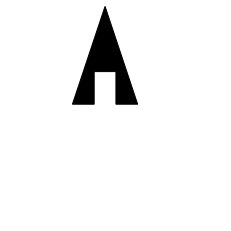

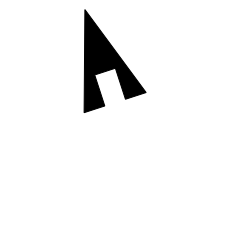

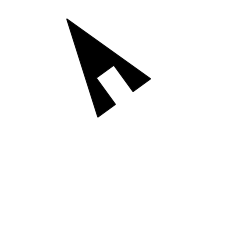

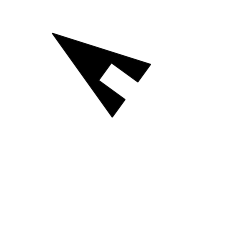

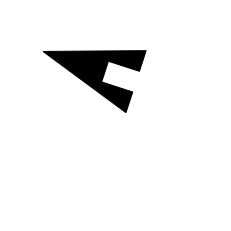

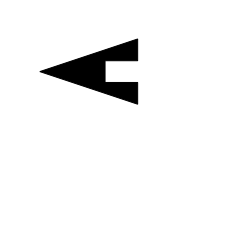

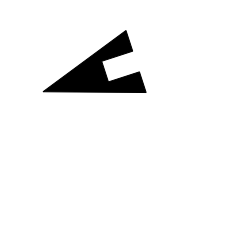

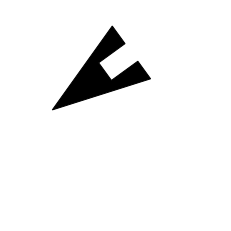

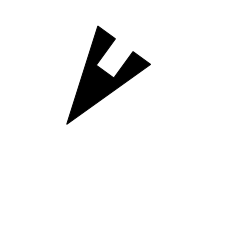

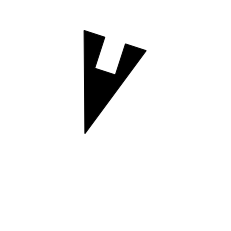

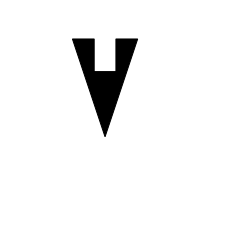

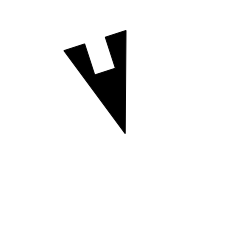

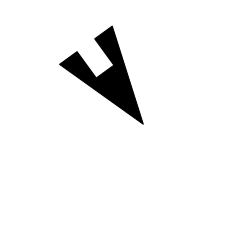

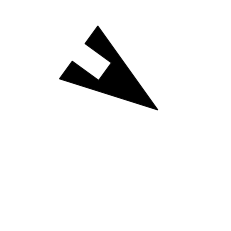

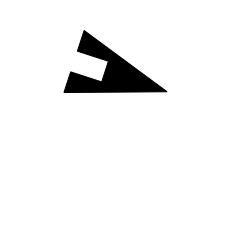

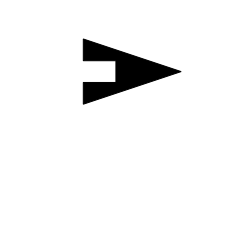

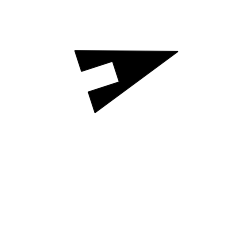

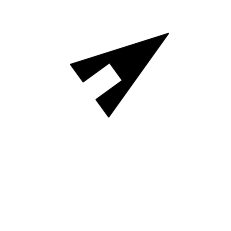

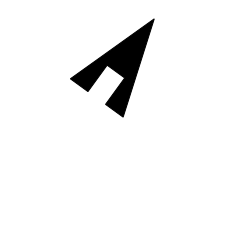

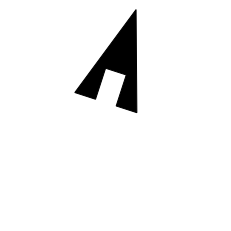

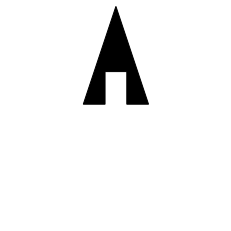

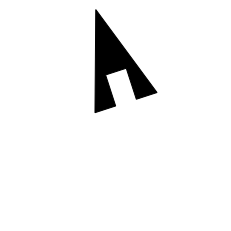

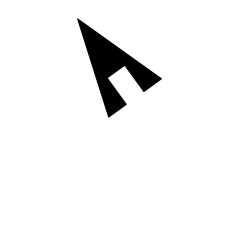

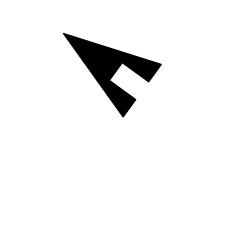

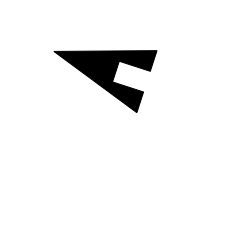

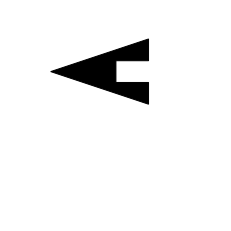

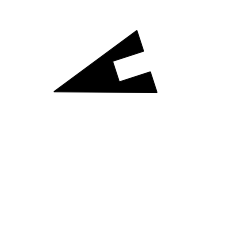

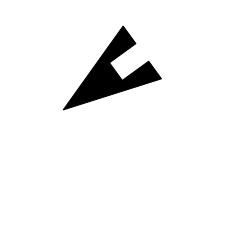

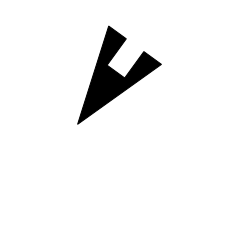

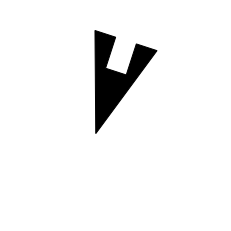

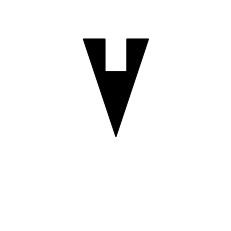

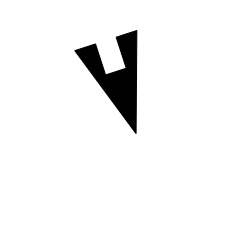

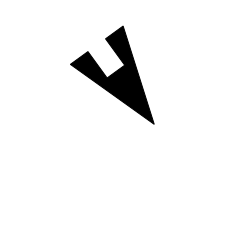

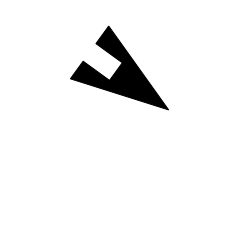

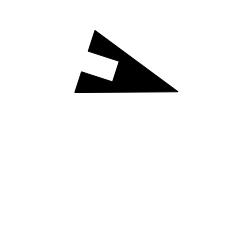

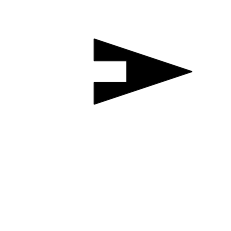

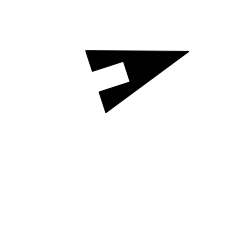

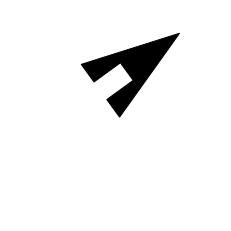

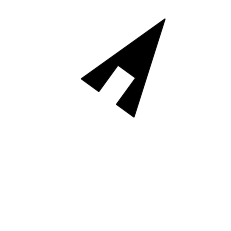

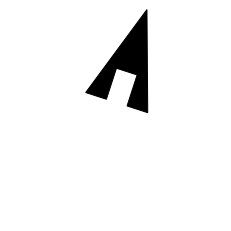

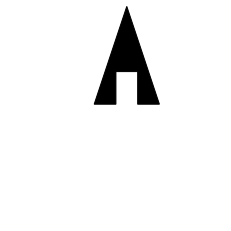

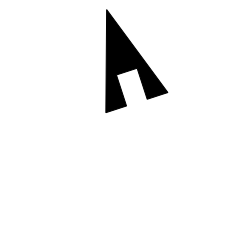

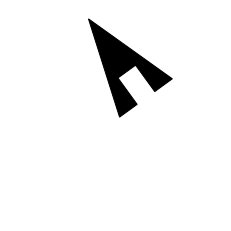

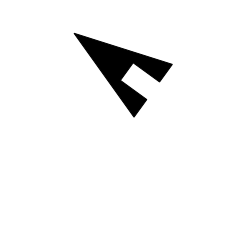

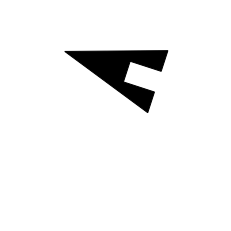

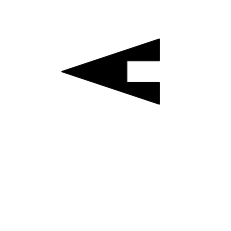

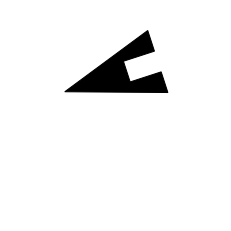

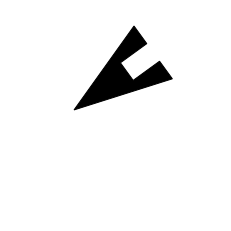

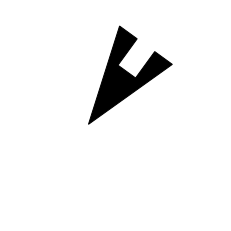

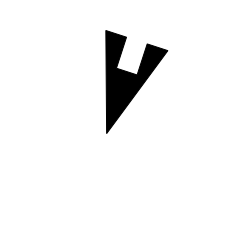

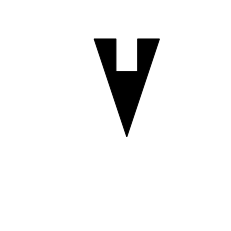

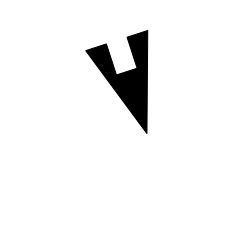

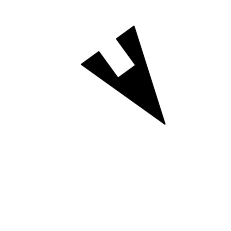

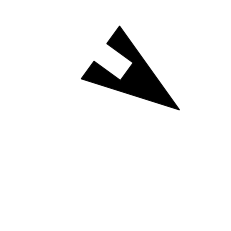

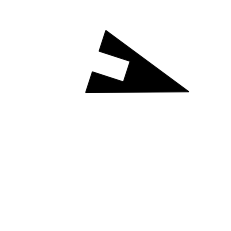

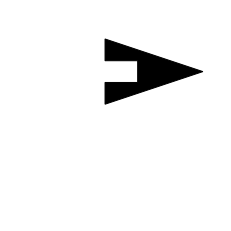

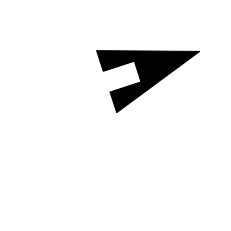

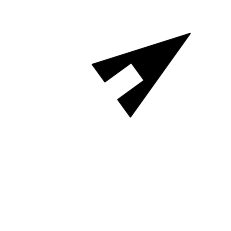

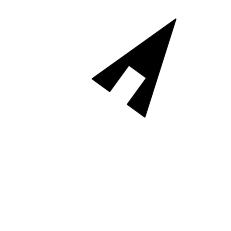

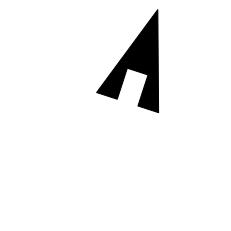

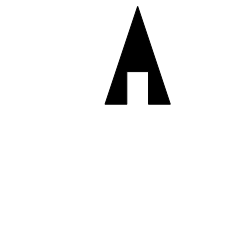

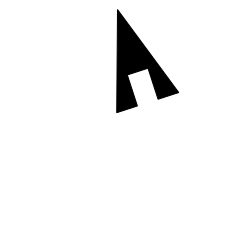

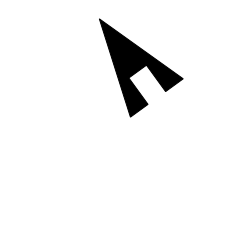

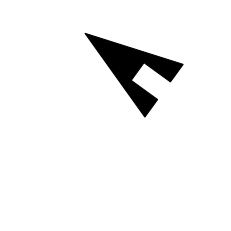

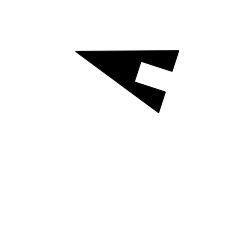

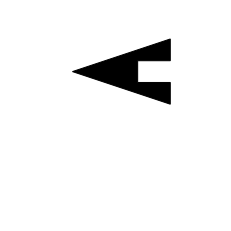

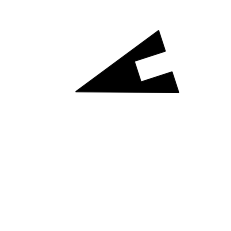

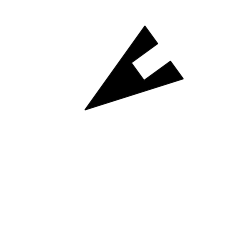

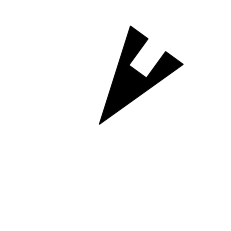

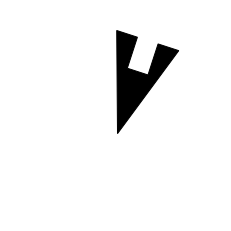

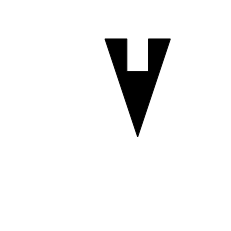

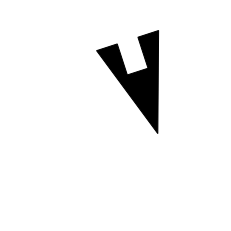

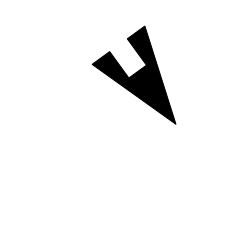

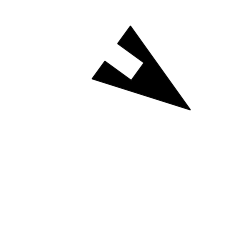

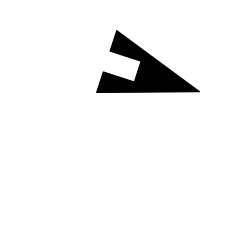

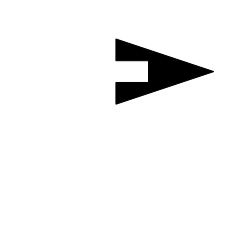

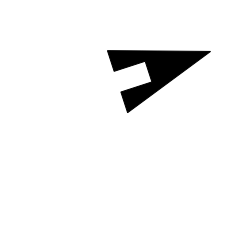

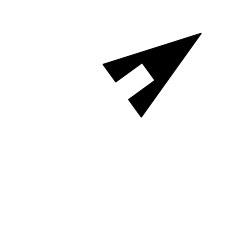

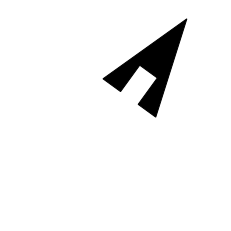

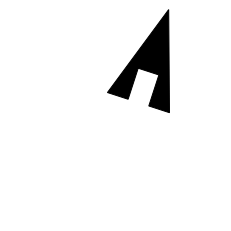

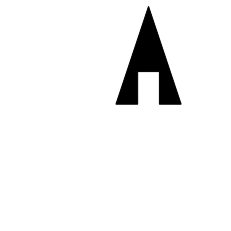

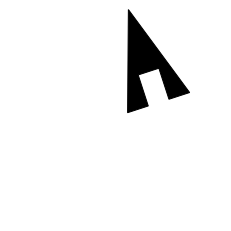

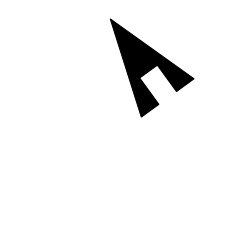

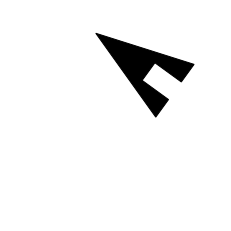

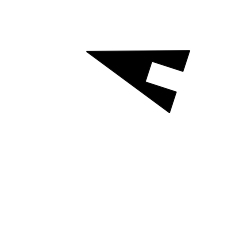

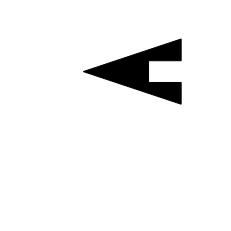

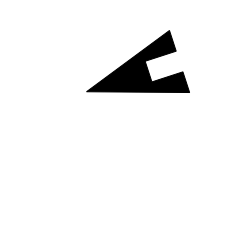

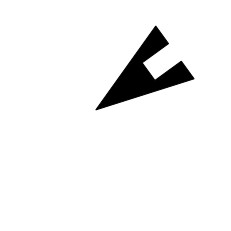

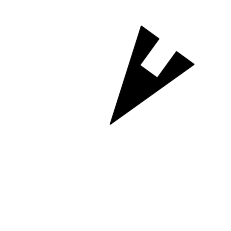

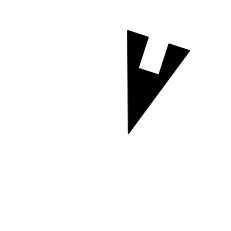

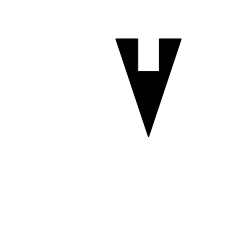

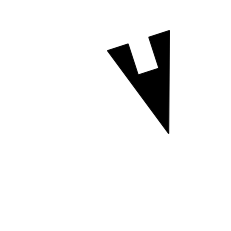

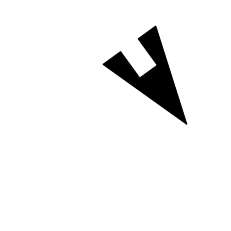

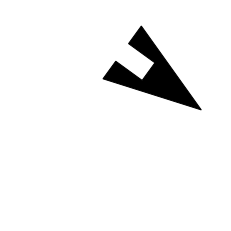

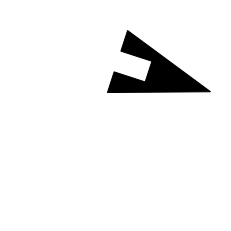

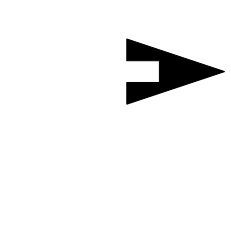

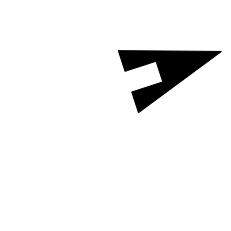

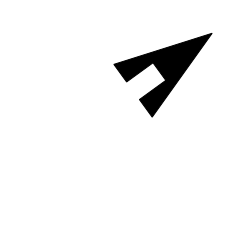

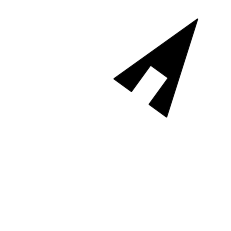

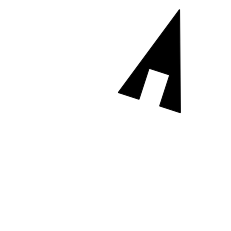

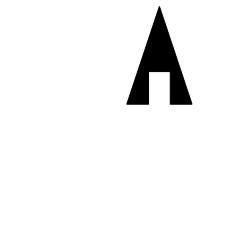

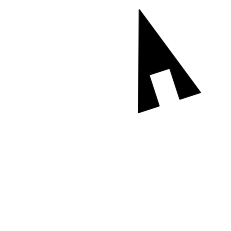

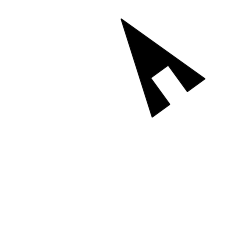

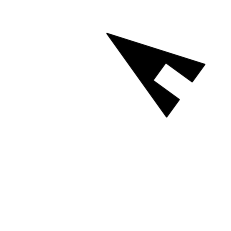

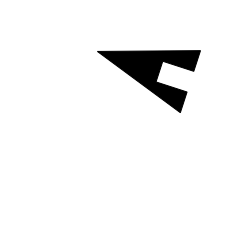

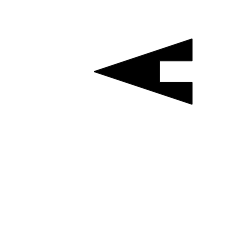

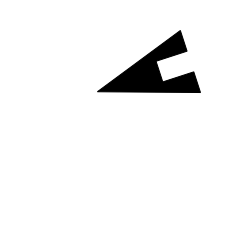

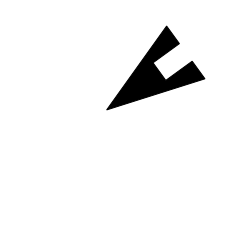

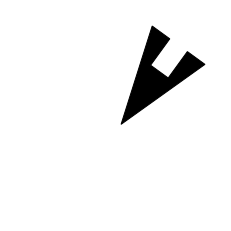

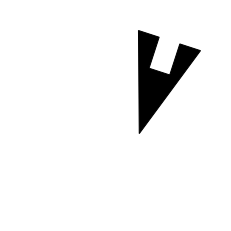

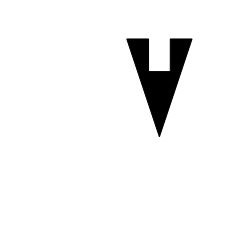

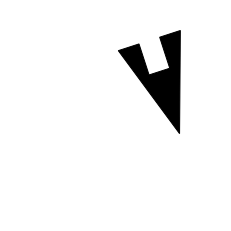

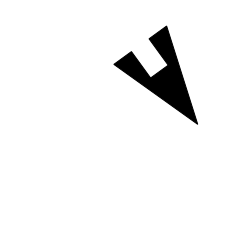

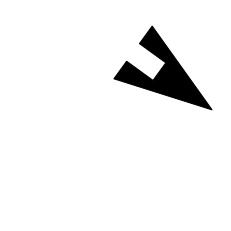

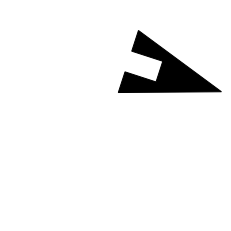

In [25]:
for x in range(0,9):
    for angle in range(0,20):
        fig, ax = plt.subplots()
        ax.arrow(0.3+x*0.05,0.3+y*0.05,0.3*np.cos(np.pi*angle/10),0.3*np.sin(np.pi*angle/10),
                 width = 0.1, length_includes_head = True, 
                 head_width = 0.3, color = 'black')
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        plt.gca().set_aspect('equal', adjustable='box')
        plt.axis('off')  
        plt.savefig('rot_trans'+str(x)+'-'+str(angle)+'.png', dpi=50)

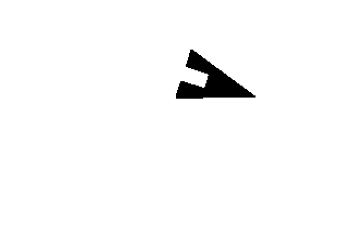

In [26]:
rot_trans = []
for x in range(0,9):
    for angle in range(0,20):
        image = imread('rot_trans'+str(x)+'-'+str(angle)+'.png')
        gray = rgb2gray(image)    
        plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
        plt.axis('off')
        np.shape(gray)
        rot_trans.append(gray.reshape(-1))

We are expecting something like a cylinder, so we better embbed in R^3

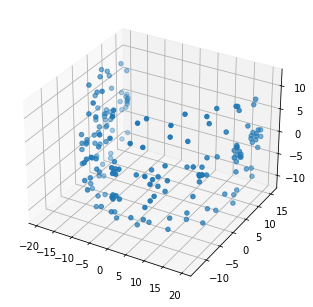

In [27]:
pca = PCA(n_components=3)
data = pca.fit_transform(rot_trans)

fig = plt.figure()
ax = Axes3D(fig)

scatter = ax.scatter(data[:,0], data[:,1], data[:,2])
plt.show()

Does look like a semi-cylinder, let us see under ISOMAP

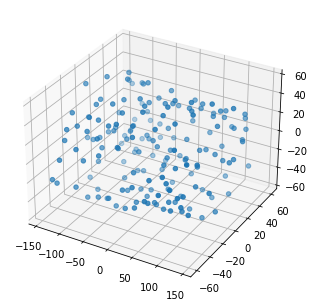

In [28]:
embedding = Isomap(n_components=3)
data = embedding.fit_transform(rot_trans)

fig = plt.figure()
ax = Axes3D(fig)

scatter = ax.scatter(data[:,0], data[:,1], data[:,2])
plt.show()

Which looks like something as a cylinder inside a cylinder when we rotate it. Let us check if we can, at least, find some cycles

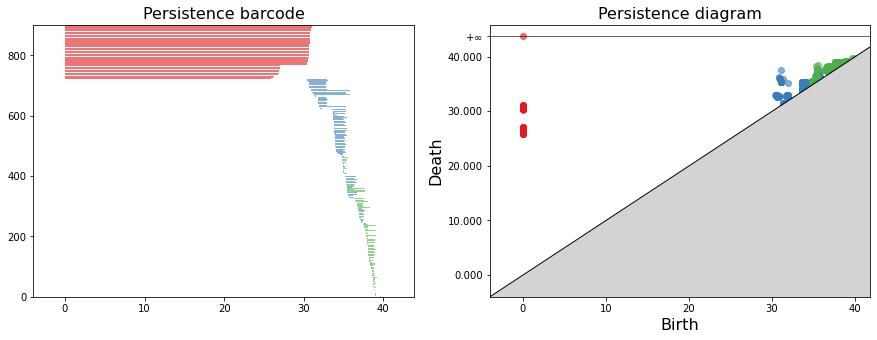

In [29]:
rips = gudhi.RipsComplex(points = rot_trans, max_edge_length = 50)
st = rips.create_simplex_tree(max_dimension = 3)
barcodes = st.persistence(homology_coeff_field = 2)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
gudhi.plot_persistence_barcode(barcodes, axes = ax1)
gudhi.plot_persistence_diagram(barcodes, axes = ax2)
plt.show()

Again, it looks like there is something there, but too noisy to say it with certainty. Doing some dimensionality tricks

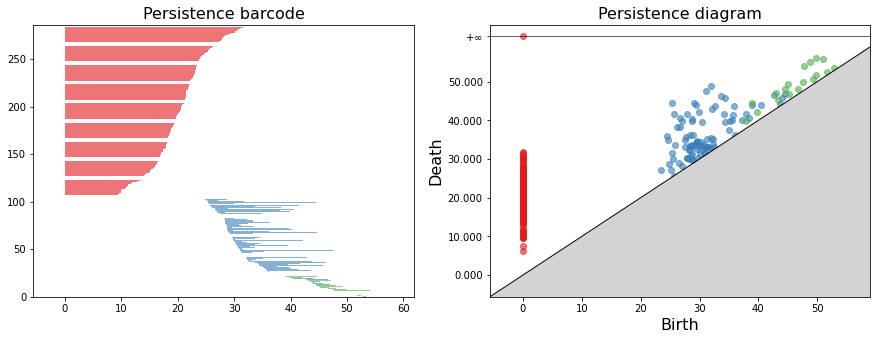

In [30]:
embedding = Isomap(n_components=3)
data = embedding.fit_transform(rot_trans)

rips = gudhi.RipsComplex(points = data, max_edge_length = 70)
st = rips.create_simplex_tree(max_dimension = 3)
barcodes = st.persistence(homology_coeff_field = 2)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
gudhi.plot_persistence_barcode(barcodes, axes = ax1)
gudhi.plot_persistence_diagram(barcodes, axes = ax2)
plt.show()

Many 1-cycles and no significant 2-cycles. The questions to be asked though is: would a cylinder look something like this

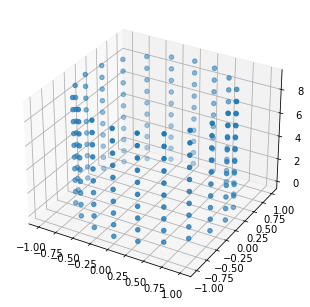

In [31]:
cylinder = []
for z in range(0,10):
    for angle in range(0,20):
        cylinder.append(np.array([np.cos(np.pi*angle/10), np.sin(np.pi*angle/10), z])) 
cylinder = np.array(cylinder)

fig = plt.figure()
ax = Axes3D(fig)

scatter = ax.scatter(cylinder[:,0], cylinder[:,1], cylinder[:,2])
plt.show()

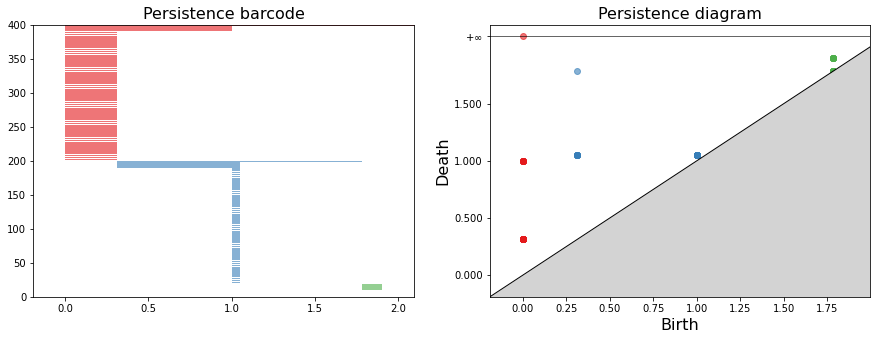

In [32]:
rips = gudhi.RipsComplex(points = cylinder, max_edge_length = 2)
st = rips.create_simplex_tree(max_dimension = 3)
barcodes = st.persistence(homology_coeff_field = 2)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1); ax2 = fig.add_subplot(1,2,2)
gudhi.plot_persistence_barcode(barcodes, axes = ax1)
gudhi.plot_persistence_diagram(barcodes, axes = ax2)
plt.show()

It can be seen that we have several 1-cycles of same length and no 2-cycles, which is good for what we are looking after, eventhough still not conclusive enought to claim that the spanned space is indeed a cylinder

# Periodic translations

Finally, let us look at the space spanned by periodic translations. As they are periodic, we expect orbits to be closed and, potentially, have some SO_2 symmetry

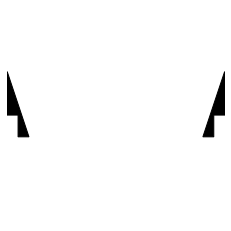

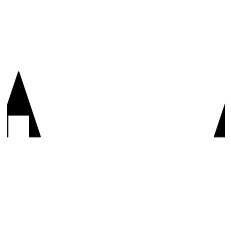

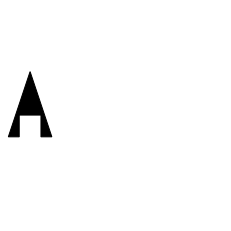

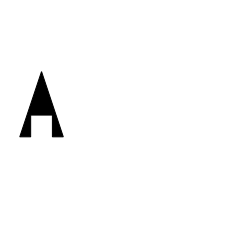

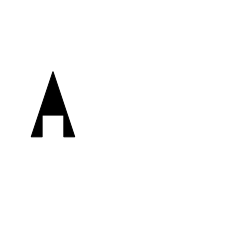

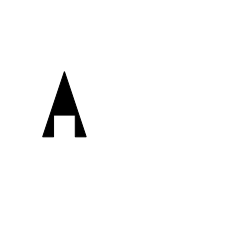

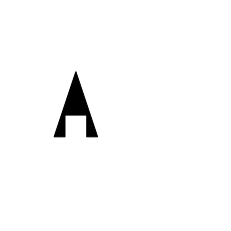

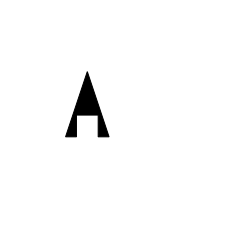

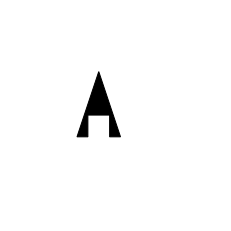

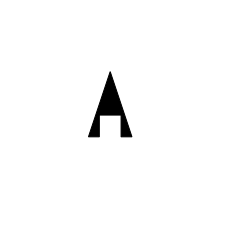

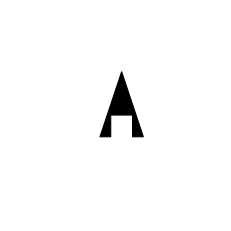

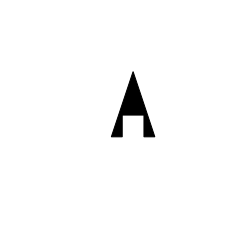

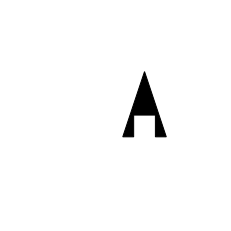

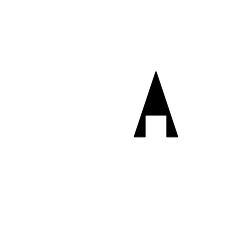

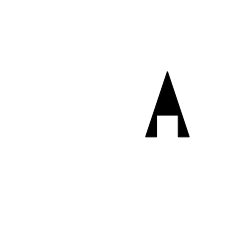

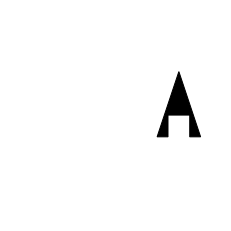

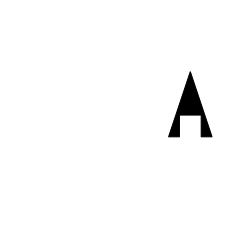

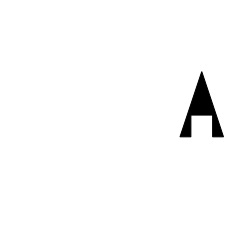

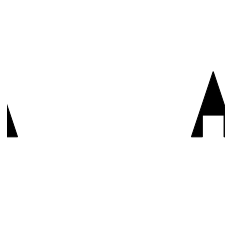

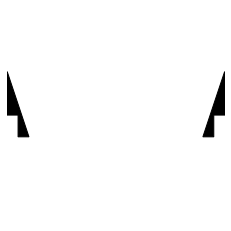

In [33]:
for value in np.linspace(0, 1, num=20):    
    fig, ax = plt.subplots()
    if value<0.1:
        ax.arrow(1+value,0.5,0,0.2, width = 0.1, length_includes_head = True, head_width = 0.2, color = 'black')
        ax.arrow(value,0.5,0,0.2, width = 0.1, length_includes_head = True, 
                 head_width = 0.2, color = 'black')
    elif value>0.9:
        ax.arrow(0-(1-value),0.5,0,0.2, width = 0.1, length_includes_head = True, head_width = 0.2, color = 'black')
        ax.arrow(value,0.5,0,0.2, width = 0.1, length_includes_head = True, 
                 head_width = 0.2, color = 'black')
    else:
        ax.arrow(value,0.5,0,0.2, width = 0.1, length_includes_head = True, 
                 head_width = 0.2, color = 'black')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    plt.gca().set_aspect('equal', adjustable='box') 
    plt.axis('off')  
    plt.draw()
    plt.savefig('torus'+str(value)+'.png', dpi=50) #dpi controls the number of pixels used
    

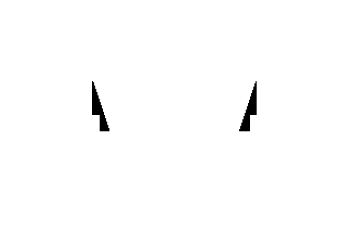

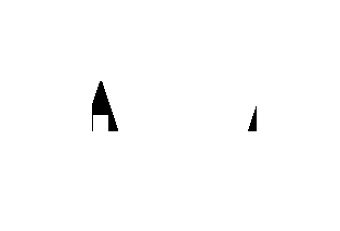

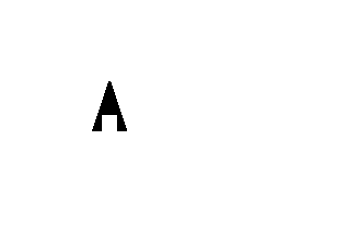

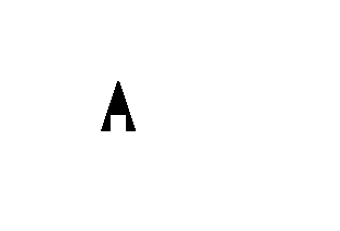

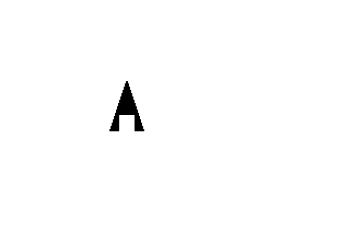

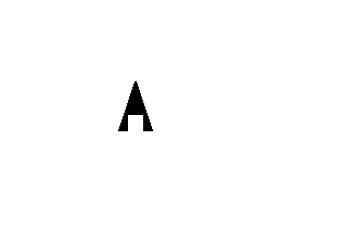

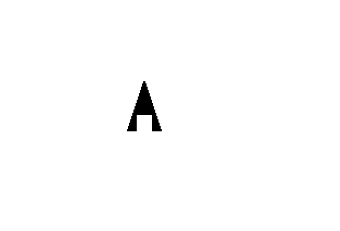

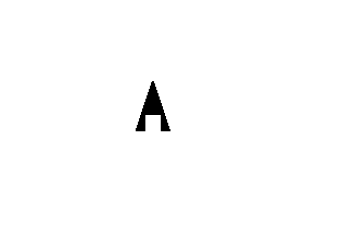

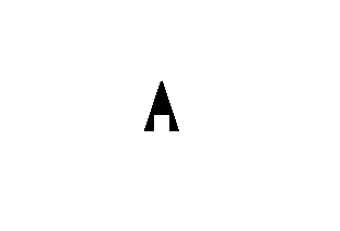

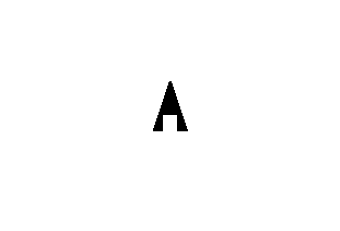

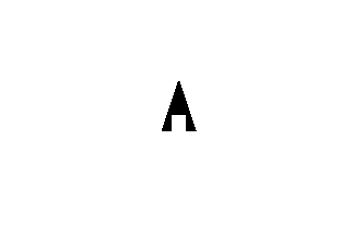

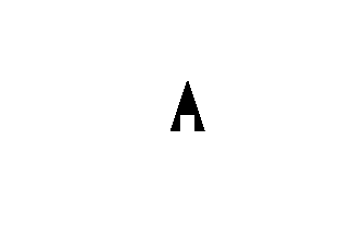

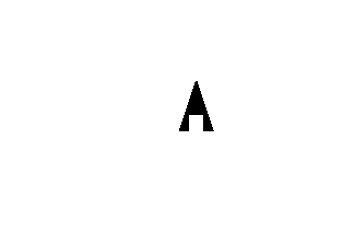

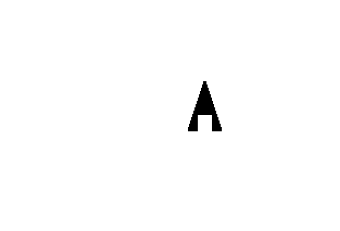

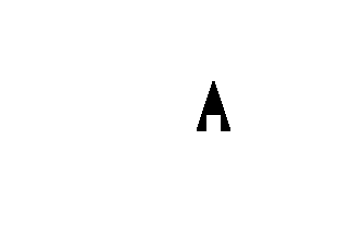

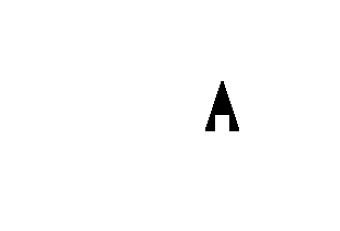

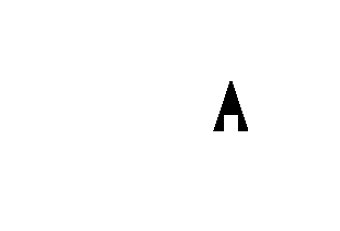

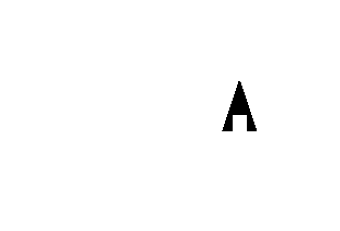

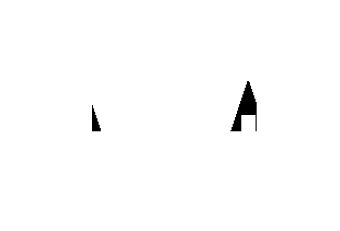

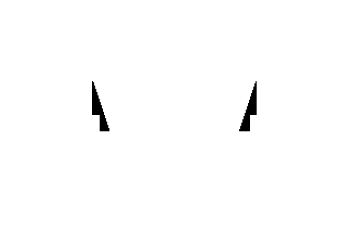

In [34]:
periodic_dataset = []
for value in np.linspace(0, 1, num=20):
    image = imread('torus'+str(value)+'.png')
    gray = rgb2gray(image)    
    plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    np.shape(gray)
    periodic_dataset.append(gray.reshape(-1))

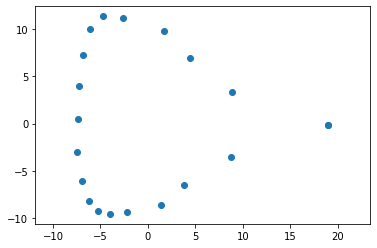

In [35]:
pca = PCA(n_components=2)
data = pca.fit_transform(periodic_dataset)
scatter = plt.scatter(data[:,0],data[:,1])
plt.axis("equal")
plt.show()

This is a pretty interesting shape. First, one can clearly see that the orbit is closed and symmetric, as we expected. Second, for some reasons, the arrows which fall within the outside frame region tend to stretch the shape of what seemed to be a pretty convincing circle (or perhaps an ellipsis). Why this is happening is still a mistery and will require some more information about the embedding process itself